 # House Price Prediction
 
 # Introduction
 <font color = 'green'>


**1.** [Business Problem](#1)
    
**2.** [About Dataset](#2)
    
**3.** [Data Loading & Checking](#3)
    
**4.** [Exploratory Data Analysis (EDA)](#4)
   
* **4.1** [Analysis of Categorical Variables](#5)
* **4.2** [Analysis of Numerical Variables](#6)
* **4.3** [Target Variable Analysis](#7)
* **4.4** [Outlier Analysis](#8)
* **4.5** [Correlation Analysis](#9)
    
**5.** [Data Preprocessing](#10)
    
* **5.1** [Missing Values ](#11)
* **5.2** [Outlier Supression](#12)
* **5.3** [Encoding for Base Model](#13)
* **5.4** [Scaling for Base Model](#14)
    
**6.** [Base Model](#15)
    
* **6.1** [Hold-out Method](#16)
* **6.2** [Modeling](#17)
* **6.3** [Model Performance Evaluation](#18)
    
**7.** [Feature Engineering](#19)
    
* **7.1** [Feature Extraction](#20)
* **7.2** [Encoding for Current & New Features](#21)
* **7.3** [Feature Scaling](#22)
    
**8.** [Model](#23)
    
* **8.1** [Hold-out Method](#24)
* **8.2** [Modeling](#25)
* **8.3** [Model Performance Evaluation](#26)
* **8.4** [Cross Validation](#27)

**9.** [Hyperparameter Tuning](#28)
    
* **9.1** [Determining Parameters](#29)
* **9.2** [Best Parameters & Best Scores](#30)   
    
**10.** [Final Model](#31)   
* **10.1** [Modeling](#32)
* **10.2** [Cross Validation](#33)
* **10.3** [Feature Importance](#34)
* **10.4** [Prediction](#35)
* **10.5** [Creating a Submission File](#36)

<a id = "1"></a><br>
## 1. Business Problem

A machine learning project is desired to predict prices of different types of houses using a dataset containing features of each house and their respective prices.

<a id = "2"></a>
## 2. About Dataset

The dataset for this project, which includes housing units in Ames, Iowa, contains 79 explanatory variables. You can access the dataset and competition page on Kaggle using the link below. Since it’s part of a Kaggle competition, there are two separate CSV files: one for training data and another for testing data. In the test dataset, house prices are left blank, and you’re expected to predict these values.

* **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
* **MSSubClass:** The building class
* **MSZoning:** The general zoning classification
* **LotFrontage:** Linear feet of street connected to property
* **LotArea:** Lot size in square feet
* **Street:** Type of road access
* **Alley:** Type of alley access
* **LotShape:** General shape of property
* **LandContour:** Flatness of the property
* **Utilities:** Type of utilities available
* **LotConfig:** Lot configuration
* **LandSlope:** Slope of property
* **Neighborhood:** Physical locations within Ames city limits
* **Condition1:** Proximity to main road or railroad
* **Condition2:** Proximity to main road or railroad (if a second is present)
* **BldgType:** Type of dwelling
* **HouseStyle:** Style of dwelling
* **OverallQual:** Overall material and finish quality
* **OverallCond:** Overall condition rating
* **YearBuilt:** Original construction date
* **YearRemodAdd:** Remodel date
* **RoofStyle:** Type of roof
* **RoofMatl:** Roof material
* **Exterior1st:** Exterior covering on house
* **Exterior2nd:** Exterior covering on house (if more than one material)
* **MasVnrType:** Masonry veneer type
* **MasVnrArea:** Masonry veneer area in square feet
* **ExterQual:** Exterior material quality
* **ExterCond:** Present condition of the material on the exterior
* **Foundation:** Type of foundation
* **BsmtQual:** Height of the basement
* **BsmtCond:** General condition of the basement
* **BsmtExposure:** Walkout or garden level basement walls
* **BsmtFinType1:** Quality of basement finished area
* **BsmtFinSF1:** Type 1 finished square feet
* **BsmtFinType2:** Quality of second finished area (if present)
* **BsmtFinSF2:** Type 2 finished square feet
* **BsmtUnfSF:** Unfinished square feet of basement area
* **TotalBsmtSF:** Total square feet of basement area
* **Heating:** Type of heating
* **HeatingQC:** Heating quality and condition
* **CentralAir:** Central air conditioning
* **Electrical:** Electrical system
* **1stFlrSF:** First Floor square feet
* **2ndFlrSF:** Second floor square feet
* **LowQualFinSF:** Low quality finished square feet (all floors)
* **GrLivArea:** Above grade (ground) living area square feet
* **BsmtFullBath:** Basement full bathrooms
* **BsmtHalfBath:** Basement half bathrooms
* **FullBath:** Full bathrooms above grade
* **HalfBath:** Half baths above grade
* **Bedroom:** Number of bedrooms above basement level
* **Kitchen:** Number of kitchens
* **KitchenQual:** Kitchen quality
* **TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)
* **Functional:** Home functionality rating
* **Fireplaces:** Number of fireplaces
* **FireplaceQu:** Fireplace quality
* **GarageType:** Garage location
* **GarageYrBlt:** Year garage was built
* **GarageFinish:** Interior finish of the garage
* **GarageCars:** Size of garage in car capacity
* **GarageArea:** Size of garage in square feet
* **GarageQual:** Garage quality
* **GarageCond:** Garage condition
* **PavedDrive:** Paved driveway
* **WoodDeckSF:** Wood deck area in square feet
* **OpenPorchSF:** Open porch area in square feet
* **EnclosedPorch:** Enclosed porch area in square feet
* **3SsnPorch:** Three season porch area in square feet
* **ScreenPorch:** Screen porch area in square feet
* **PoolArea:** Pool area in square feet
* **PoolQC:** Pool quality
* **Fence:** Fence quality
* **MiscFeature:** Miscellaneous feature not covered in other categories
* **MiscVal:** $Value of miscellaneous feature
* **MoSold:** Month Sold
* **YrSold:** Year Sold
* **SaleType:** Type of sale
* **SaleCondition:** Condition of sale

<a id = "3"></a><br>
## 3. Data Loading & Checking

In [115]:
!pip install missingno as msno
!pip install pydotplus
!pip install astor
!pip install joblib
!pip install skompiler

!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install scikit-learn
!pip install catboost
!pip install lightgbm
!pip install xgboost
!pip install joblib
!pip install pydotplus
!pip install skompiler


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_validate
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, StandardScaler,LabelEncoder,RobustScaler

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression,Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
#rom lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

import joblib 
import pydotplus
from skompiler import skompile
import datetime as dt

from sklearn.pipeline import Pipeline

import warnings
warnings.simplefilter(action="ignore")
from sklearn.exceptions import ConvergenceWarning

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option("display.width", 500)

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [21]:
#upload the dataset:

train = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv')

In [22]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [23]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [31]:
df= pd.concat([train, test], ignore_index=False)

In [32]:
# defining a function to upload the dataset

def load(dataframe): 
    df = dataframe.copy()
    return df

In [33]:
df = load(df_) # copy of the dataset
df.head()  # display first 5 rows

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal   208500.0  
1   2007        WD         Normal   181500.0  
2   2008        WD         Normal   223500.0  
3   2006        WD        Abnorml   140000.0  
4   2008        WD         Normal   250000.0  

[5 rows x 81 columns]

<a id = "4"></a>
## 4. Exploratory Data Analysis

In [34]:
# defining function to check all: 

def check_df(dataframe,head = 5):
    print("##################### SHAPE ####################")
    print(dataframe.shape)
    print("#################### COLUMNS ###################")
    print(dataframe.columns)
    print("#################### INDEX ###################")
    print(dataframe.index)
    print("#################### TYPES ##################")
    print(dataframe.dtypes)
    print("#################### NA ANY ###################")
    print(dataframe.isnull().values.any())
    print(f"#################### NA SUM - RATIO ####################")
    print(pd.DataFrame({"na_sum": dataframe.isnull().sum(),
                        "ratio": dataframe.isnull().sum() / dataframe.shape[0]}))
    print("#################### QUANTILES ###############")
    print(dataframe.describe().T)

check_df(df)

##################### SHAPE ####################
(2919, 81)
#################### COLUMNS ###################
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
   

In [35]:
# converting dtypes for date columns:

date_year = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']
for col in date_year:
    df[col] = pd.to_datetime(df[col],format='%Y').dt.year

In [36]:
# converting dtypes for date columns:

date_months = ['MoSold']
for col in date_months:
    df[col] = pd.to_datetime(df[col], format='%m').dt.month

In [37]:
#checking:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [38]:
#checking:

df[['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']].head()

YearBuilt  YearRemodAdd  GarageYrBlt  MoSold  YrSold
0       2003          2003       2003.0       2    2008
1       1976          1976       1976.0       5    2007
2       2001          2002       2001.0       9    2008
3       1915          1970       1998.0       2    2006
4       2000          2000       2000.0      12    2008

In [39]:
# Capturing numeric and categorical variables:

def grab_col_names(dataframe, cat_th = 10, car_th = 20):
    # cat_cols, cat_but_car:
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in df.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    # num_cols:
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    return cat_cols, num_cols , cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

In [40]:
print(f"Categoric columns:{len(cat_cols)}") # categorical columns
print(f"Numeric columns:{len(num_cols)}") # numeric columns
print(f"Cardinal columns:{len(cat_but_car)}") # categorical type but cardinal columns
print(f"Checking: total columns(cat_num_car):{len(cat_cols + num_cols + cat_but_car)} , dataset total columns:{len(df.columns)}")

Categoric columns:52
Numeric columns:28
Cardinal columns:1
Checking: total columns(cat_num_car):81 , dataset total columns:81


In [41]:
cat_but_car # categorical type but cardinal columns

['Neighborhood']

> **Editing column types which we need:**

In [42]:
# defining a function to update cat_cols & num_cols by cat_but_car:

def col_types_updating_with_id_columns(dataframe,id_cols,car_but_cat_cols = [],cat_but_num_wrong = [],date_columns =[]):
    # updating num_cols,cat_cols:
    cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
    for col in cat_but_car:    
        if len(cat_but_car) > 0:
            num_cols.append(col)
            cat_cols.append(col)
            num_cols = [n_col for n_col in num_cols if (n_col not in id_cols) & (n_col not in car_but_cat_cols)]
            cat_cols = [c_col for c_col in cat_cols if (c_col not in id_cols) & (c_col not in num_cols)]
        else:continue
    for col in cat_but_num_wrong:    
        if len(cat_but_num_wrong) > 0:
            cat_cols.append(col)
            num_cols.remove(col)
            cat_cols = [c_col for c_col in cat_cols if (c_col not in id_cols)]
        else:continue 
    for col in date_columns:    
        if len(date_columns) > 0:
            if col in cat_cols:
                cat_cols.remove(col)
            if col in num_cols:
                num_cols.remove(col)
            date_cols = [d_col for d_col in date_columns if (d_col not in id_cols)]
        else:continue  
    return num_cols,cat_cols,date_cols

In [43]:
#id lists:

ids = ['Id']

In [44]:
# changing the categoric columns but in cat_but_car:

car_but_cat_cols = ['Neighborhood']

In [45]:
# changing the categoric columns but in num_cols:

cat_but_num_wrong = ["MSSubClass","OverallQual"] 

In [46]:
date_cols = ["MoSold","YrSold","GarageYrBlt","YearBuilt","YearRemodAdd"]

In [47]:
# applying the function:

num_cols,cat_cols,date_cols = col_types_updating_with_id_columns(df,ids,car_but_cat_cols,cat_but_num_wrong,date_cols)

In [48]:
cat_but_car

['Neighborhood']

In [49]:
date_cols

['MoSold', 'YrSold', 'GarageYrBlt', 'YearBuilt', 'YearRemodAdd']

In [50]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'Neighborhood',
 'MSSubClass',
 'OverallQual']

In [51]:
num_cols

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice']

In [52]:
#defining a function to change dtypes:

def update_not_correct_dtype(dataframe,num_cols,cat_cols):
    not_correct_dtype_n = [col for col in num_cols if dataframe[col].dtypes not in ["float64","int64","int32","datetime64[ns]"]]
    not_correct_dtype_c = [col for col in cat_cols if dataframe[col].dtypes not in ["O","category","datetime64[ns]"]]
    if len(not_correct_dtype_n) > 0:
        for col in not_correct_dtype_n:
            dataframe[col] = dataframe[col].astype("float64")
    if len(not_correct_dtype_c) > 0:    
        for col in not_correct_dtype_c:
            dataframe[col] = dataframe[col].astype("O")
    return not_correct_dtype_n,not_correct_dtype_c

In [53]:
# applying the function:
update_not_correct_dtype(df,num_cols,cat_cols)

([],
 ['OverallCond',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'Fireplaces',
  'GarageCars',
  'MSSubClass',
  'OverallQual'])

In [54]:
#checking:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   object 
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   object 
 18  OverallCond  

<a id = "5"></a>
### 4.1 Analysis of Categorical Variables

In [55]:
# defining a function to check summary of the categorical variables:

def cat_summary(dataframe,col_name,plot = False):
    print(f"#################### {col_name} Counts - Ratio ####################")
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print(f"#################### {col_name} Unique Variable Counts ####################")
    print(f"{col_name} : {dataframe[col_name].nunique()}")
    if plot:
        print(f"#################### {col_name} Counts - Ratio Visualizing ####################")
    if plot:
        sns.countplot(x = dataframe[col_name], data = dataframe)
        plt.show(block = True)

#################### MSZoning Counts - Ratio ####################
          MSZoning      Ratio
MSZoning                     
RL            2265  77.595067
RM             460  15.758822
FV             139   4.761905
RH              26   0.890716
C (all)         25   0.856458
#################### MSZoning Unique Variable Counts ####################
MSZoning : 5
#################### MSZoning Counts - Ratio Visualizing ####################


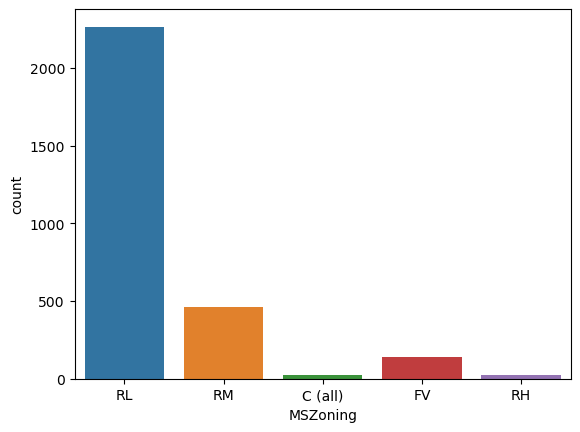

#################### Street Counts - Ratio ####################
        Street    Ratio
Street                 
Pave      2907  99.5889
Grvl        12   0.4111
#################### Street Unique Variable Counts ####################
Street : 2
#################### Street Counts - Ratio Visualizing ####################


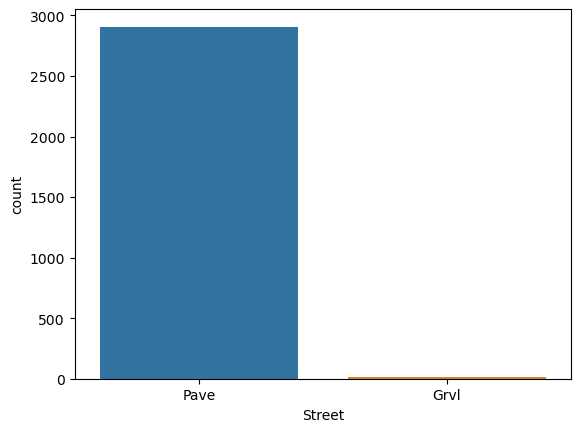

#################### Alley Counts - Ratio ####################
       Alley     Ratio
Alley                 
Grvl     120  4.110997
Pave      78  2.672148
#################### Alley Unique Variable Counts ####################
Alley : 2
#################### Alley Counts - Ratio Visualizing ####################


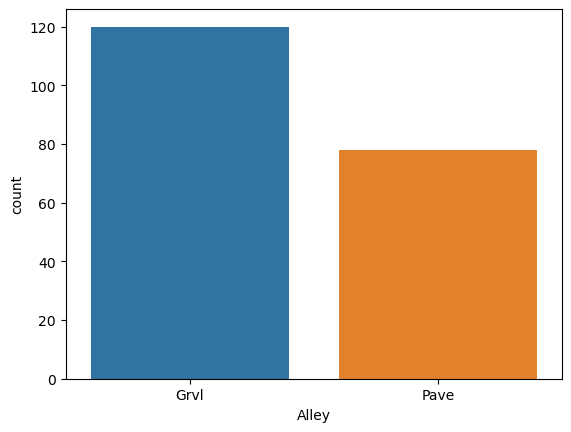

#################### LotShape Counts - Ratio ####################
          LotShape      Ratio
LotShape                     
Reg           1859  63.686194
IR1            968  33.162042
IR2             76   2.603631
IR3             16   0.548133
#################### LotShape Unique Variable Counts ####################
LotShape : 4
#################### LotShape Counts - Ratio Visualizing ####################


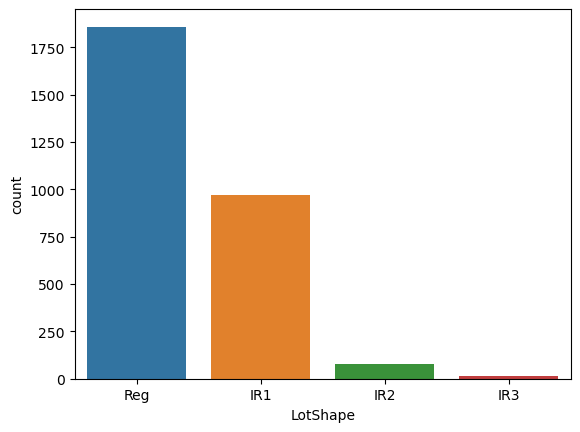

#################### LandContour Counts - Ratio ####################
             LandContour      Ratio
LandContour                        
Lvl                 2622  89.825283
HLS                  120   4.110997
Bnk                  117   4.008222
Low                   60   2.055498
#################### LandContour Unique Variable Counts ####################
LandContour : 4
#################### LandContour Counts - Ratio Visualizing ####################


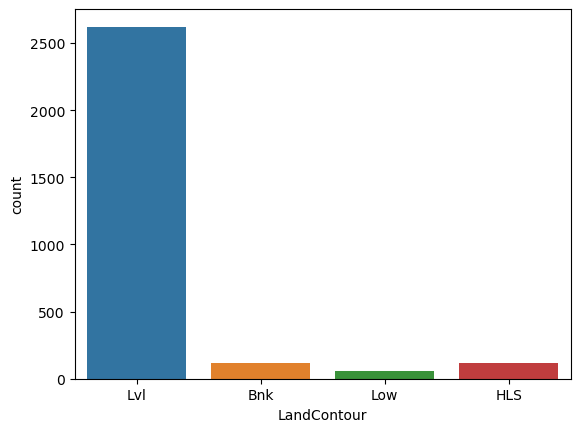

#################### Utilities Counts - Ratio ####################
           Utilities      Ratio
Utilities                      
AllPub          2916  99.897225
NoSeWa             1   0.034258
#################### Utilities Unique Variable Counts ####################
Utilities : 2
#################### Utilities Counts - Ratio Visualizing ####################


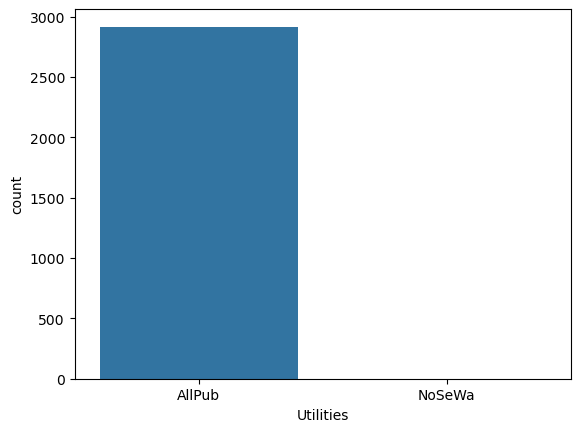

#################### LotConfig Counts - Ratio ####################
           LotConfig      Ratio
LotConfig                      
Inside          2133  73.072970
Corner           511  17.505995
CulDSac          176   6.029462
FR2               85   2.911956
FR3               14   0.479616
#################### LotConfig Unique Variable Counts ####################
LotConfig : 5
#################### LotConfig Counts - Ratio Visualizing ####################


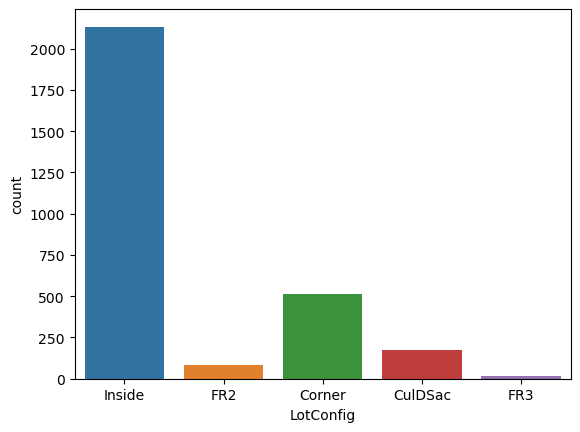

#################### LandSlope Counts - Ratio ####################
           LandSlope      Ratio
LandSlope                      
Gtl             2778  95.169579
Mod              125   4.282288
Sev               16   0.548133
#################### LandSlope Unique Variable Counts ####################
LandSlope : 3
#################### LandSlope Counts - Ratio Visualizing ####################


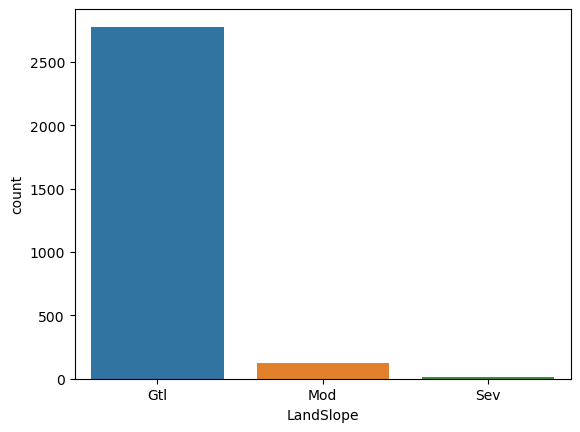

#################### Condition1 Counts - Ratio ####################
            Condition1      Ratio
Condition1                       
Norm              2511  86.022610
Feedr              164   5.618362
Artery              92   3.151764
RRAn                50   1.712915
PosN                39   1.336074
RRAe                28   0.959233
PosA                20   0.685166
RRNn                 9   0.308325
RRNe                 6   0.205550
#################### Condition1 Unique Variable Counts ####################
Condition1 : 9
#################### Condition1 Counts - Ratio Visualizing ####################


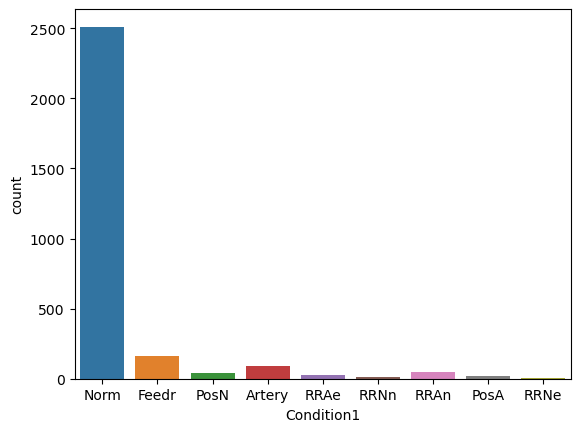

#################### Condition2 Counts - Ratio ####################
            Condition2      Ratio
Condition2                       
Norm              2889  98.972251
Feedr               13   0.445358
Artery               5   0.171292
PosN                 4   0.137033
PosA                 4   0.137033
RRNn                 2   0.068517
RRAn                 1   0.034258
RRAe                 1   0.034258
#################### Condition2 Unique Variable Counts ####################
Condition2 : 8
#################### Condition2 Counts - Ratio Visualizing ####################


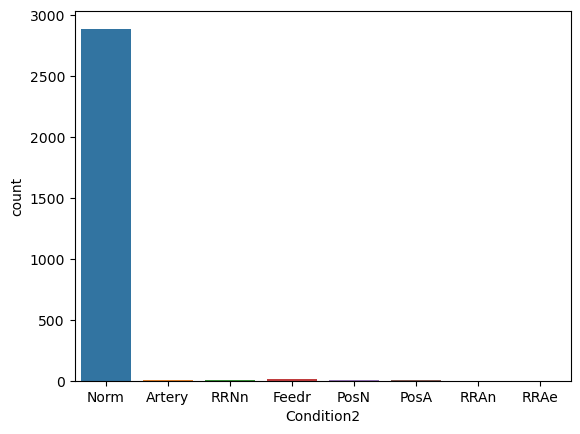

#################### BldgType Counts - Ratio ####################
          BldgType      Ratio
BldgType                     
1Fam          2425  83.076396
TwnhsE         227   7.776636
Duplex         109   3.734156
Twnhs           96   3.288798
2fmCon          62   2.124015
#################### BldgType Unique Variable Counts ####################
BldgType : 5
#################### BldgType Counts - Ratio Visualizing ####################


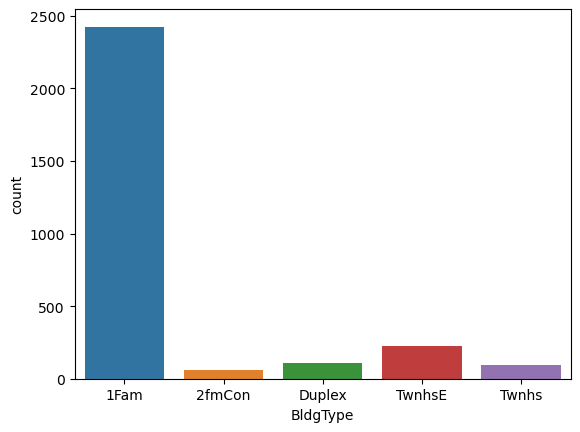

#################### HouseStyle Counts - Ratio ####################
            HouseStyle      Ratio
HouseStyle                       
1Story            1471  50.393971
2Story             872  29.873244
1.5Fin             314  10.757109
SLvl               128   4.385063
SFoyer              83   2.843440
2.5Unf              24   0.822199
1.5Unf              19   0.650908
2.5Fin               8   0.274066
#################### HouseStyle Unique Variable Counts ####################
HouseStyle : 8
#################### HouseStyle Counts - Ratio Visualizing ####################


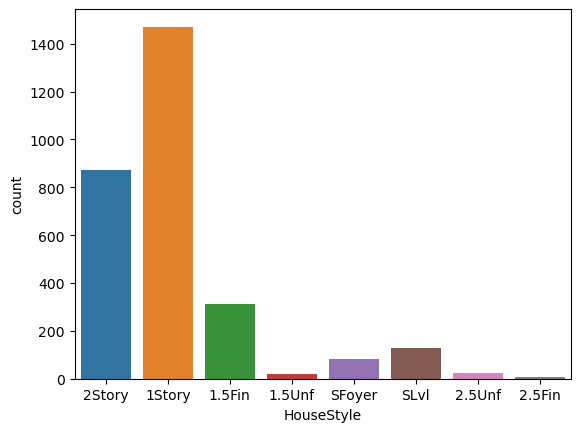

#################### RoofStyle Counts - Ratio ####################
           RoofStyle      Ratio
RoofStyle                      
Gable           2310  79.136691
Hip              551  18.876328
Gambrel           22   0.753683
Flat              20   0.685166
Mansard           11   0.376841
Shed               5   0.171292
#################### RoofStyle Unique Variable Counts ####################
RoofStyle : 6
#################### RoofStyle Counts - Ratio Visualizing ####################


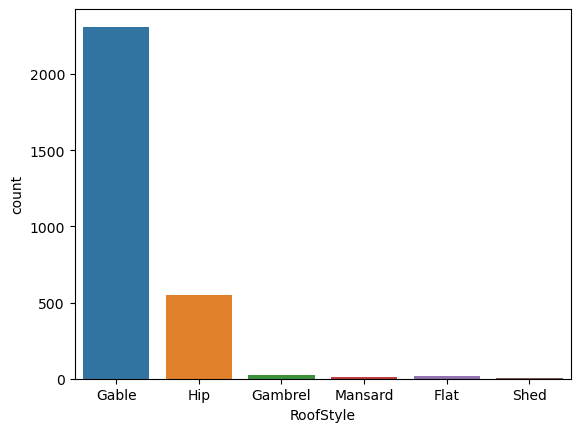

#################### RoofMatl Counts - Ratio ####################
          RoofMatl      Ratio
RoofMatl                     
CompShg       2876  98.526893
Tar&Grv         23   0.787941
WdShake          9   0.308325
WdShngl          7   0.239808
Metal            1   0.034258
Membran          1   0.034258
Roll             1   0.034258
ClyTile          1   0.034258
#################### RoofMatl Unique Variable Counts ####################
RoofMatl : 8
#################### RoofMatl Counts - Ratio Visualizing ####################


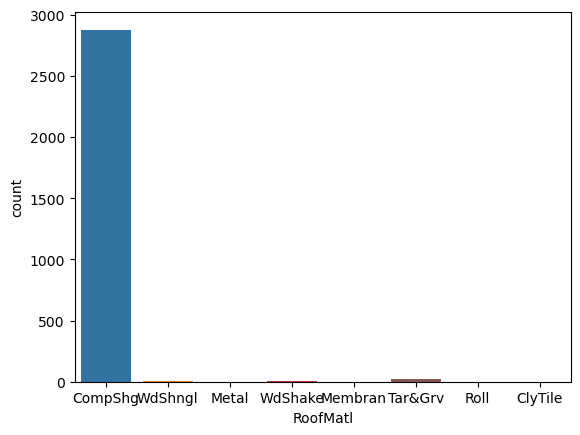

#################### Exterior1st Counts - Ratio ####################
             Exterior1st      Ratio
Exterior1st                        
VinylSd             1025  35.114765
MetalSd              450  15.416238
HdBoard              442  15.142172
Wd Sdng              411  14.080164
Plywood              221   7.571086
CemntBd              126   4.316547
BrkFace               87   2.980473
WdShing               56   1.918465
AsbShng               44   1.507366
Stucco                43   1.473107
BrkComm                6   0.205550
AsphShn                2   0.068517
Stone                  2   0.068517
CBlock                 2   0.068517
ImStucc                1   0.034258
#################### Exterior1st Unique Variable Counts ####################
Exterior1st : 15
#################### Exterior1st Counts - Ratio Visualizing ####################


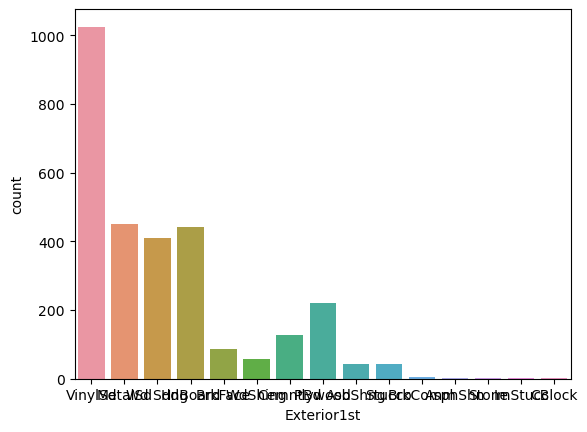

#################### Exterior2nd Counts - Ratio ####################
             Exterior2nd      Ratio
Exterior2nd                        
VinylSd             1014  34.737924
MetalSd              447  15.313464
HdBoard              406  13.908873
Wd Sdng              391  13.394998
Plywood              270   9.249743
CmentBd              126   4.316547
Wd Shng               81   2.774923
BrkFace               47   1.610140
Stucco                47   1.610140
AsbShng               38   1.301816
Brk Cmn               22   0.753683
ImStucc               15   0.513875
Stone                  6   0.205550
AsphShn                4   0.137033
CBlock                 3   0.102775
Other                  1   0.034258
#################### Exterior2nd Unique Variable Counts ####################
Exterior2nd : 16
#################### Exterior2nd Counts - Ratio Visualizing ####################


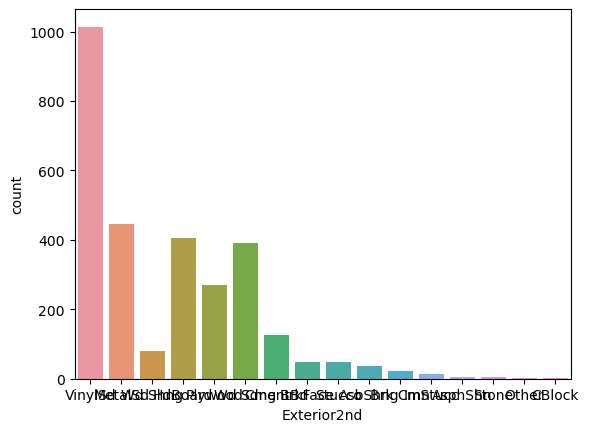

#################### MasVnrType Counts - Ratio ####################
            MasVnrType      Ratio
MasVnrType                       
BrkFace            879  30.113052
Stone              249   8.530319
BrkCmn              25   0.856458
#################### MasVnrType Unique Variable Counts ####################
MasVnrType : 3
#################### MasVnrType Counts - Ratio Visualizing ####################


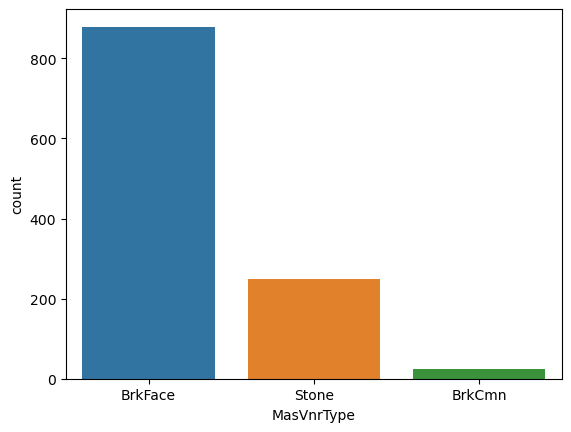

#################### ExterQual Counts - Ratio ####################
           ExterQual      Ratio
ExterQual                      
TA              1798  61.596437
Gd               979  33.538883
Ex               107   3.665639
Fa                35   1.199041
#################### ExterQual Unique Variable Counts ####################
ExterQual : 4
#################### ExterQual Counts - Ratio Visualizing ####################


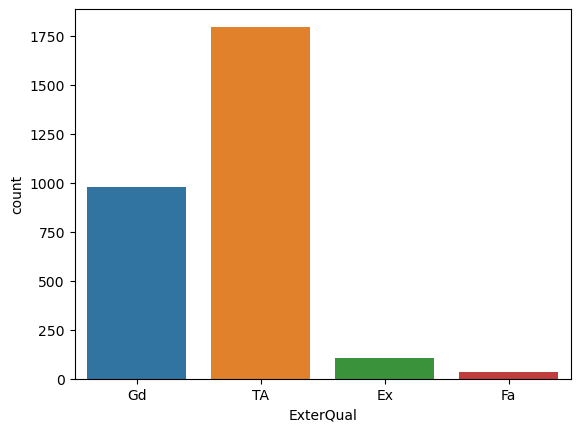

#################### ExterCond Counts - Ratio ####################
           ExterCond      Ratio
ExterCond                      
TA              2538  86.947585
Gd               299  10.243234
Fa                67   2.295307
Ex                12   0.411100
Po                 3   0.102775
#################### ExterCond Unique Variable Counts ####################
ExterCond : 5
#################### ExterCond Counts - Ratio Visualizing ####################


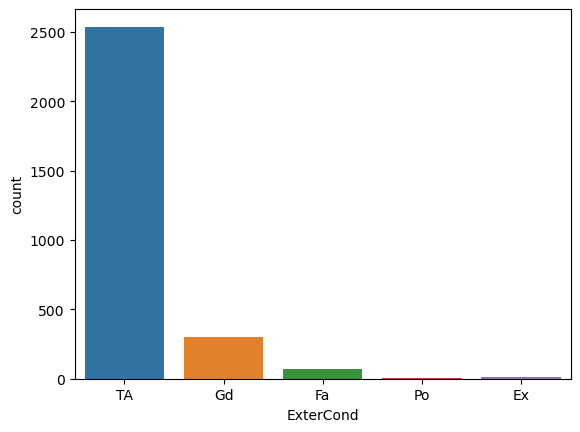

#################### Foundation Counts - Ratio ####################
            Foundation      Ratio
Foundation                       
PConc             1308  44.809866
CBlock            1235  42.309010
BrkTil             311  10.654334
Slab                49   1.678657
Stone               11   0.376841
Wood                 5   0.171292
#################### Foundation Unique Variable Counts ####################
Foundation : 6
#################### Foundation Counts - Ratio Visualizing ####################


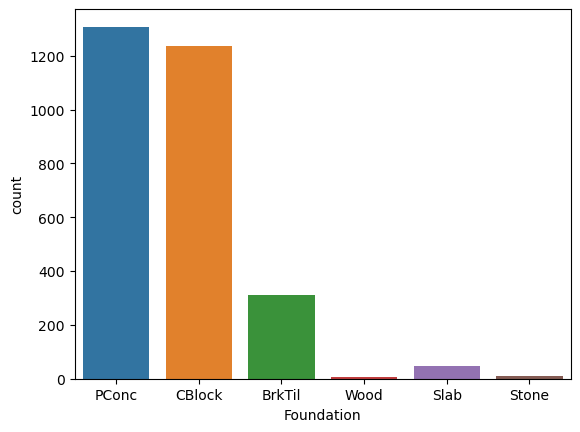

#################### BsmtQual Counts - Ratio ####################
          BsmtQual      Ratio
BsmtQual                     
TA            1283  43.953409
Gd            1209  41.418294
Ex             258   8.838643
Fa              88   3.014731
#################### BsmtQual Unique Variable Counts ####################
BsmtQual : 4
#################### BsmtQual Counts - Ratio Visualizing ####################


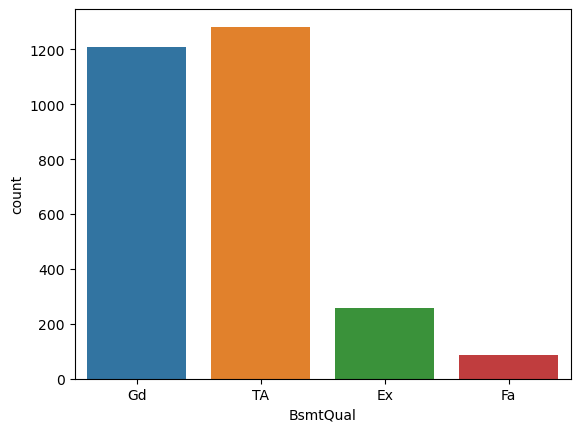

#################### BsmtCond Counts - Ratio ####################
          BsmtCond      Ratio
BsmtCond                     
TA            2606  89.277150
Gd             122   4.179514
Fa             104   3.562864
Po               5   0.171292
#################### BsmtCond Unique Variable Counts ####################
BsmtCond : 4
#################### BsmtCond Counts - Ratio Visualizing ####################


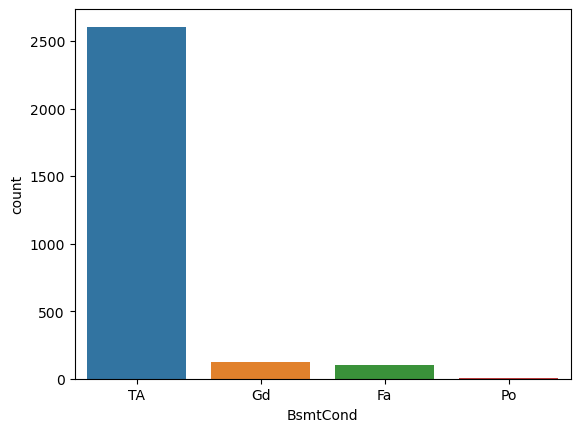

#################### BsmtExposure Counts - Ratio ####################
              BsmtExposure      Ratio
BsmtExposure                         
No                    1904  65.227818
Av                     418  14.319973
Gd                     276   9.455293
Mn                     239   8.187736
#################### BsmtExposure Unique Variable Counts ####################
BsmtExposure : 4
#################### BsmtExposure Counts - Ratio Visualizing ####################


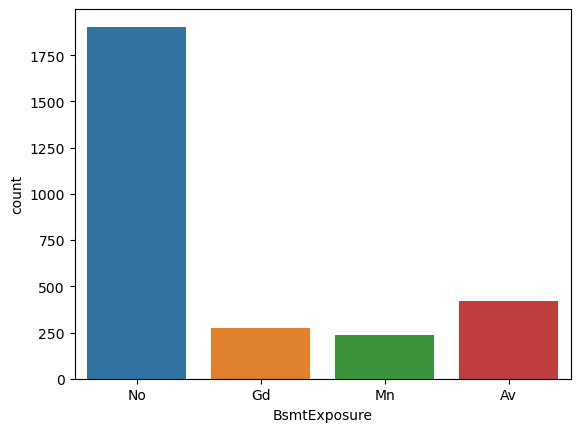

#################### BsmtFinType1 Counts - Ratio ####################
              BsmtFinType1      Ratio
BsmtFinType1                         
Unf                    851  29.153820
GLQ                    849  29.085303
ALQ                    429  14.696814
Rec                    288   9.866393
BLQ                    269   9.215485
LwQ                    154   5.275779
#################### BsmtFinType1 Unique Variable Counts ####################
BsmtFinType1 : 6
#################### BsmtFinType1 Counts - Ratio Visualizing ####################


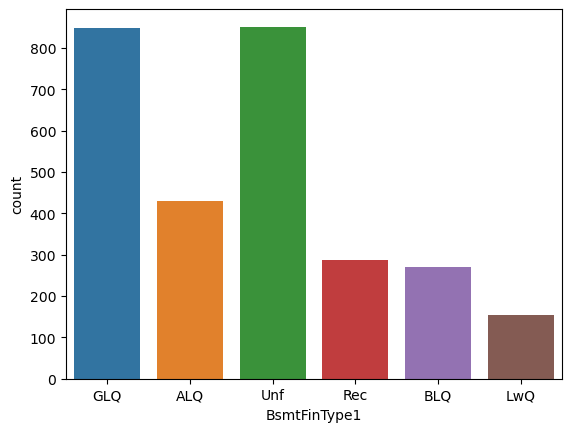

#################### BsmtFinType2 Counts - Ratio ####################
              BsmtFinType2      Ratio
BsmtFinType2                         
Unf                   2493  85.405961
Rec                    105   3.597122
LwQ                     87   2.980473
BLQ                     68   2.329565
ALQ                     52   1.781432
GLQ                     34   1.164782
#################### BsmtFinType2 Unique Variable Counts ####################
BsmtFinType2 : 6
#################### BsmtFinType2 Counts - Ratio Visualizing ####################


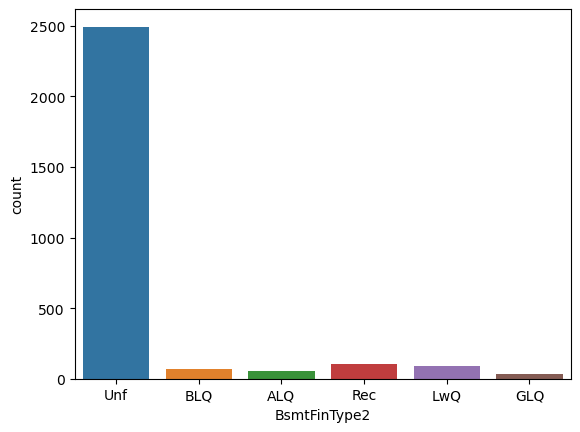

#################### Heating Counts - Ratio ####################
         Heating      Ratio
Heating                    
GasA        2874  98.458376
GasW          27   0.924974
Grav           9   0.308325
Wall           6   0.205550
OthW           2   0.068517
Floor          1   0.034258
#################### Heating Unique Variable Counts ####################
Heating : 6
#################### Heating Counts - Ratio Visualizing ####################


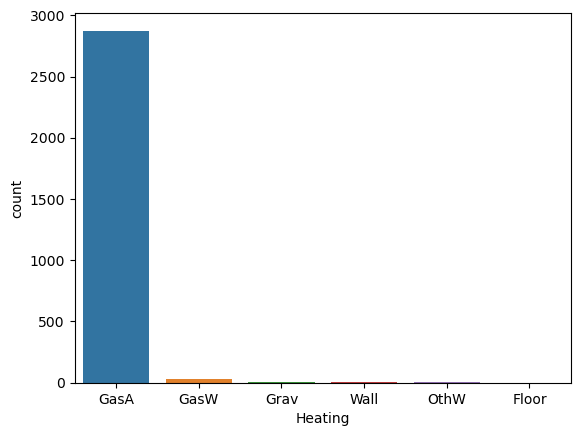

#################### HeatingQC Counts - Ratio ####################
           HeatingQC      Ratio
HeatingQC                      
Ex              1493  51.147653
TA               857  29.359370
Gd               474  16.238438
Fa                92   3.151764
Po                 3   0.102775
#################### HeatingQC Unique Variable Counts ####################
HeatingQC : 5
#################### HeatingQC Counts - Ratio Visualizing ####################


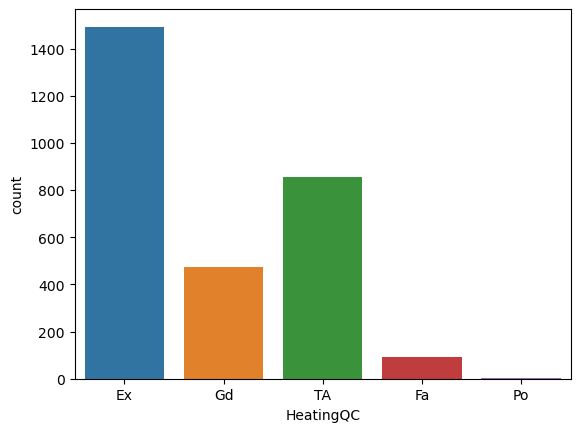

#################### CentralAir Counts - Ratio ####################
            CentralAir      Ratio
CentralAir                       
Y                 2723  93.285372
N                  196   6.714628
#################### CentralAir Unique Variable Counts ####################
CentralAir : 2
#################### CentralAir Counts - Ratio Visualizing ####################


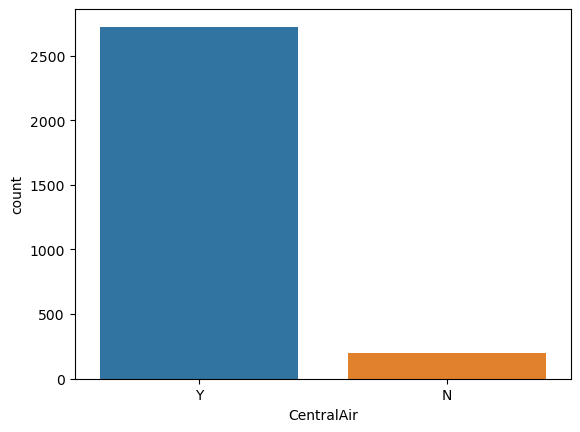

#################### Electrical Counts - Ratio ####################
            Electrical      Ratio
Electrical                       
SBrkr             2671  91.503940
FuseA              188   6.440562
FuseF               50   1.712915
FuseP                8   0.274066
Mix                  1   0.034258
#################### Electrical Unique Variable Counts ####################
Electrical : 5
#################### Electrical Counts - Ratio Visualizing ####################


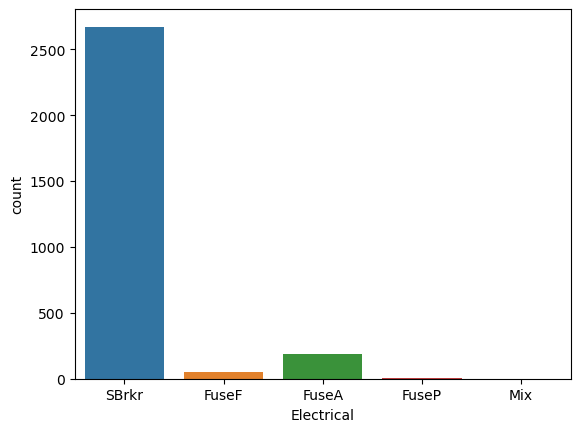

#################### KitchenQual Counts - Ratio ####################
             KitchenQual      Ratio
KitchenQual                        
TA                  1492  51.113395
Gd                  1151  39.431312
Ex                   205   7.022953
Fa                    70   2.398082
#################### KitchenQual Unique Variable Counts ####################
KitchenQual : 4
#################### KitchenQual Counts - Ratio Visualizing ####################


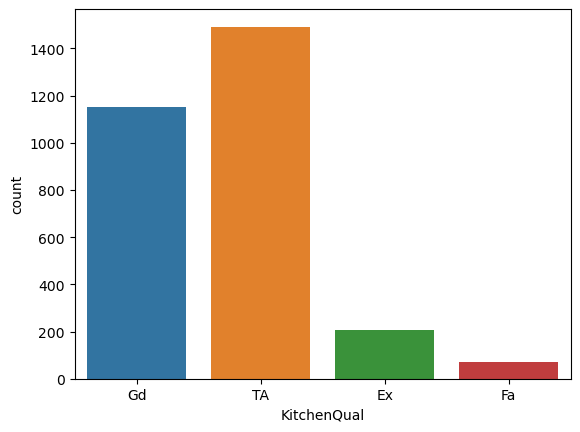

#################### Functional Counts - Ratio ####################
            Functional      Ratio
Functional                       
Typ               2717  93.079822
Min2                70   2.398082
Min1                65   2.226790
Mod                 35   1.199041
Maj1                19   0.650908
Maj2                 9   0.308325
Sev                  2   0.068517
#################### Functional Unique Variable Counts ####################
Functional : 7
#################### Functional Counts - Ratio Visualizing ####################


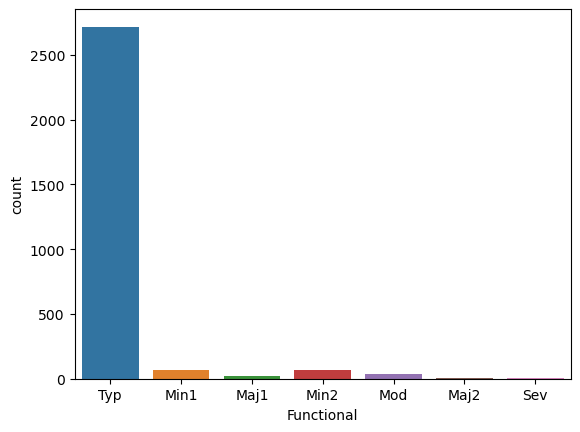

#################### FireplaceQu Counts - Ratio ####################
             FireplaceQu      Ratio
FireplaceQu                        
Gd                   744  25.488181
TA                   592  20.280918
Fa                    74   2.535115
Po                    46   1.575882
Ex                    43   1.473107
#################### FireplaceQu Unique Variable Counts ####################
FireplaceQu : 5
#################### FireplaceQu Counts - Ratio Visualizing ####################


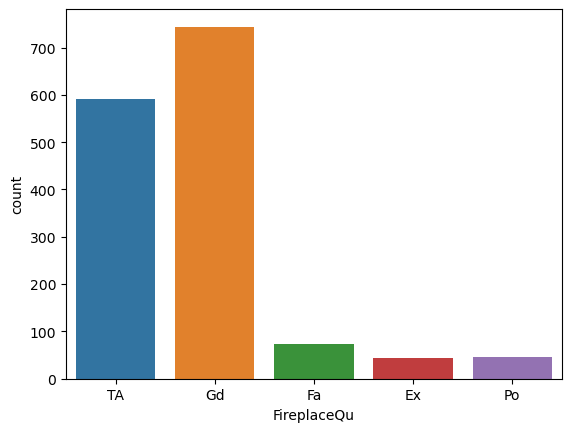

#################### GarageType Counts - Ratio ####################
            GarageType      Ratio
GarageType                       
Attchd            1723  59.027064
Detchd             779  26.687222
BuiltIn            186   6.372045
Basment             36   1.233299
2Types              23   0.787941
CarPort             15   0.513875
#################### GarageType Unique Variable Counts ####################
GarageType : 6
#################### GarageType Counts - Ratio Visualizing ####################


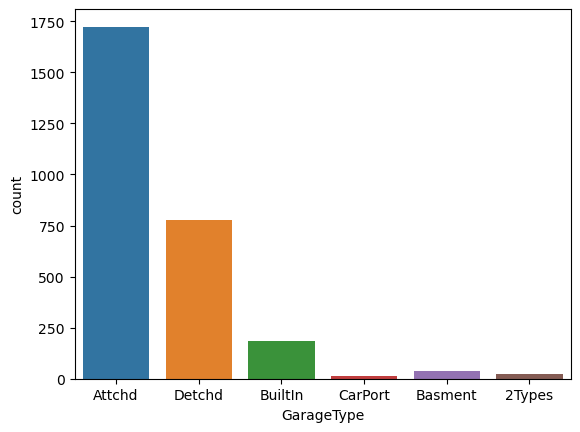

#################### GarageFinish Counts - Ratio ####################
              GarageFinish      Ratio
GarageFinish                         
Unf                   1230  42.137718
RFn                    811  27.783487
Fin                    719  24.631723
#################### GarageFinish Unique Variable Counts ####################
GarageFinish : 3
#################### GarageFinish Counts - Ratio Visualizing ####################


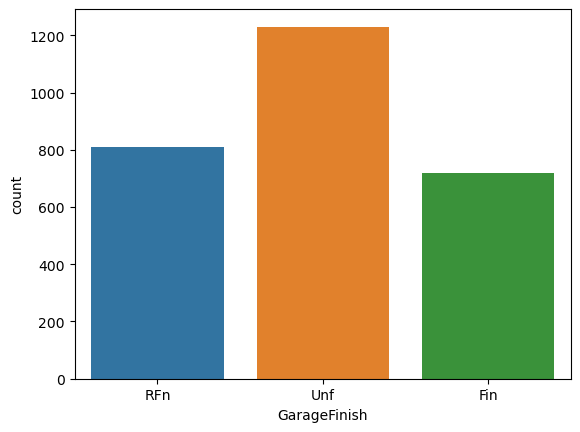

#################### GarageQual Counts - Ratio ####################
            GarageQual      Ratio
GarageQual                       
TA                2604  89.208633
Fa                 124   4.248030
Gd                  24   0.822199
Po                   5   0.171292
Ex                   3   0.102775
#################### GarageQual Unique Variable Counts ####################
GarageQual : 5
#################### GarageQual Counts - Ratio Visualizing ####################


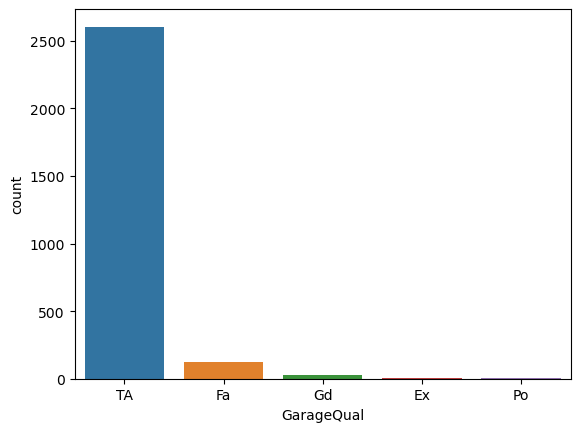

#################### GarageCond Counts - Ratio ####################
            GarageCond      Ratio
GarageCond                       
TA                2654  90.921548
Fa                  74   2.535115
Gd                  15   0.513875
Po                  14   0.479616
Ex                   3   0.102775
#################### GarageCond Unique Variable Counts ####################
GarageCond : 5
#################### GarageCond Counts - Ratio Visualizing ####################


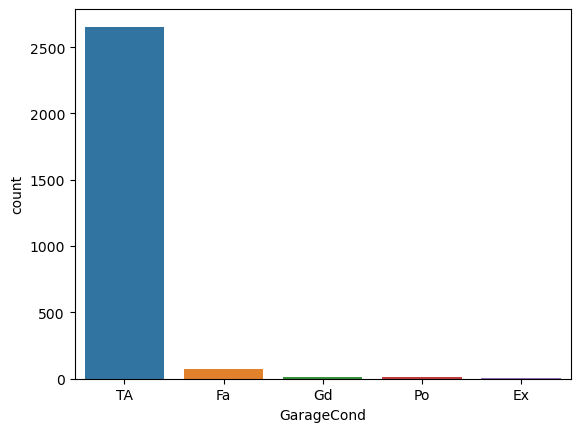

#################### PavedDrive Counts - Ratio ####################
            PavedDrive      Ratio
PavedDrive                       
Y                 2641  90.476190
N                  216   7.399794
P                   62   2.124015
#################### PavedDrive Unique Variable Counts ####################
PavedDrive : 3
#################### PavedDrive Counts - Ratio Visualizing ####################


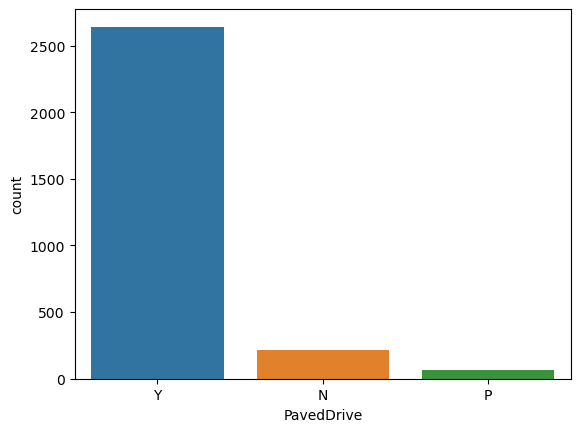

#################### PoolQC Counts - Ratio ####################
        PoolQC     Ratio
PoolQC                  
Ex           4  0.137033
Gd           4  0.137033
Fa           2  0.068517
#################### PoolQC Unique Variable Counts ####################
PoolQC : 3
#################### PoolQC Counts - Ratio Visualizing ####################


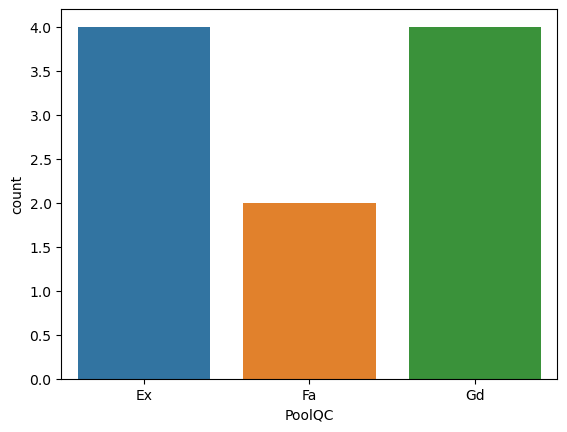

#################### Fence Counts - Ratio ####################
       Fence      Ratio
Fence                  
MnPrv    329  11.270983
GdPrv    118   4.042480
GdWo     112   3.836930
MnWw      12   0.411100
#################### Fence Unique Variable Counts ####################
Fence : 4
#################### Fence Counts - Ratio Visualizing ####################


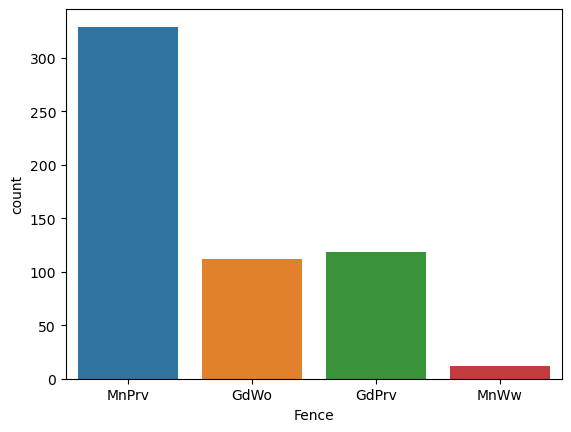

#################### MiscFeature Counts - Ratio ####################
             MiscFeature     Ratio
MiscFeature                       
Shed                  95  3.254539
Gar2                   5  0.171292
Othr                   4  0.137033
TenC                   1  0.034258
#################### MiscFeature Unique Variable Counts ####################
MiscFeature : 4
#################### MiscFeature Counts - Ratio Visualizing ####################


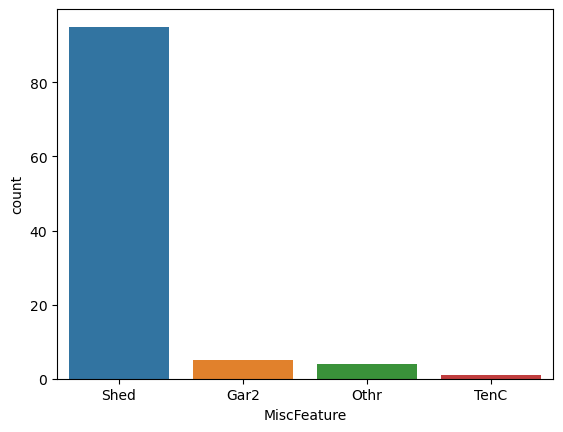

#################### SaleType Counts - Ratio ####################
          SaleType      Ratio
SaleType                     
WD            2525  86.502227
New            239   8.187736
COD             87   2.980473
ConLD           26   0.890716
CWD             12   0.411100
ConLI            9   0.308325
ConLw            8   0.274066
Oth              7   0.239808
Con              5   0.171292
#################### SaleType Unique Variable Counts ####################
SaleType : 9
#################### SaleType Counts - Ratio Visualizing ####################


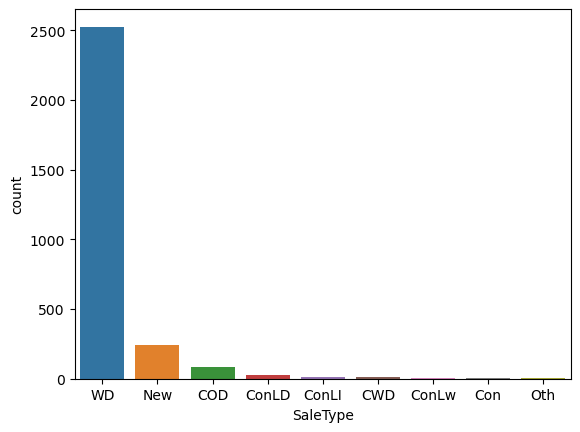

#################### SaleCondition Counts - Ratio ####################
               SaleCondition      Ratio
SaleCondition                          
Normal                  2402  82.288455
Partial                  245   8.393285
Abnorml                  190   6.509078
Family                    46   1.575882
Alloca                    24   0.822199
AdjLand                   12   0.411100
#################### SaleCondition Unique Variable Counts ####################
SaleCondition : 6
#################### SaleCondition Counts - Ratio Visualizing ####################


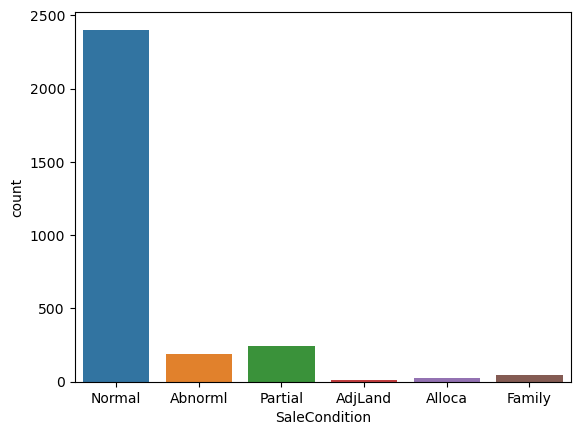

#################### OverallCond Counts - Ratio ####################
             OverallCond      Ratio
OverallCond                        
5                   1645  56.354916
6                    531  18.191161
7                    390  13.360740
8                    144   4.933196
4                    101   3.460089
3                     50   1.712915
9                     41   1.404591
2                     10   0.342583
1                      7   0.239808
#################### OverallCond Unique Variable Counts ####################
OverallCond : 9
#################### OverallCond Counts - Ratio Visualizing ####################


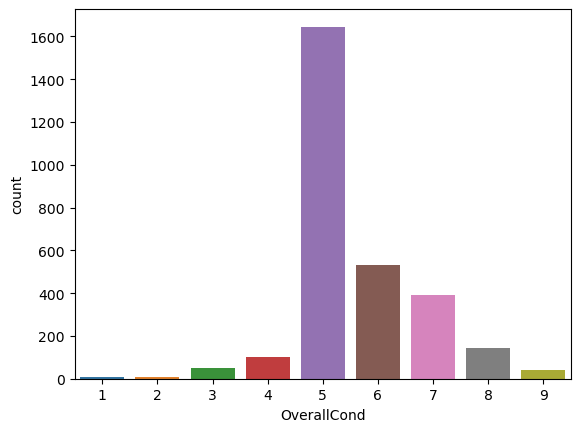

#################### BsmtFullBath Counts - Ratio ####################
              BsmtFullBath      Ratio
BsmtFullBath                         
0.0                   1705  58.410415
1.0                   1172  40.150737
2.0                     38   1.301816
3.0                      2   0.068517
#################### BsmtFullBath Unique Variable Counts ####################
BsmtFullBath : 4
#################### BsmtFullBath Counts - Ratio Visualizing ####################


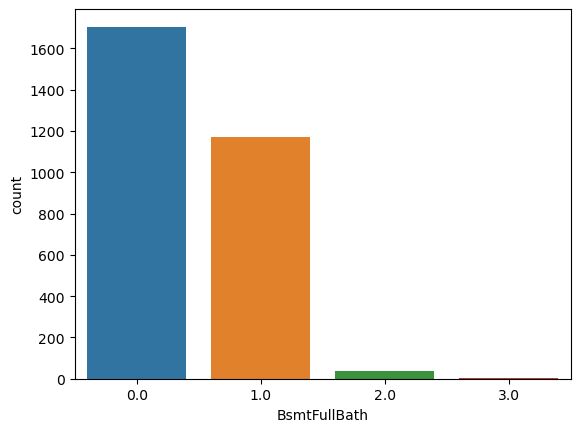

#################### BsmtHalfBath Counts - Ratio ####################
              BsmtHalfBath      Ratio
BsmtHalfBath                         
0.0                   2742  93.936280
1.0                    171   5.858171
2.0                      4   0.137033
#################### BsmtHalfBath Unique Variable Counts ####################
BsmtHalfBath : 3
#################### BsmtHalfBath Counts - Ratio Visualizing ####################


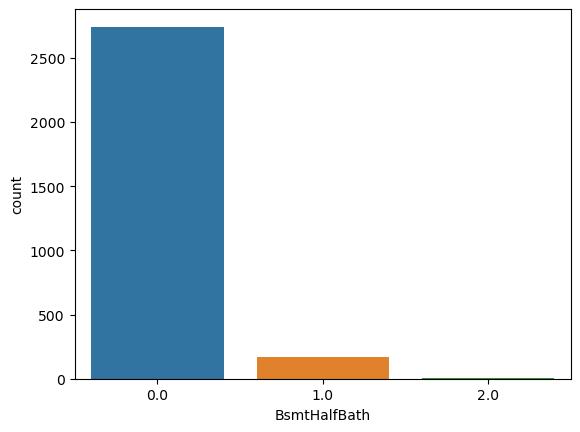

#################### FullBath Counts - Ratio ####################
          FullBath      Ratio
FullBath                     
2             1530  52.415211
1             1309  44.844125
3               64   2.192532
0               12   0.411100
4                4   0.137033
#################### FullBath Unique Variable Counts ####################
FullBath : 5
#################### FullBath Counts - Ratio Visualizing ####################


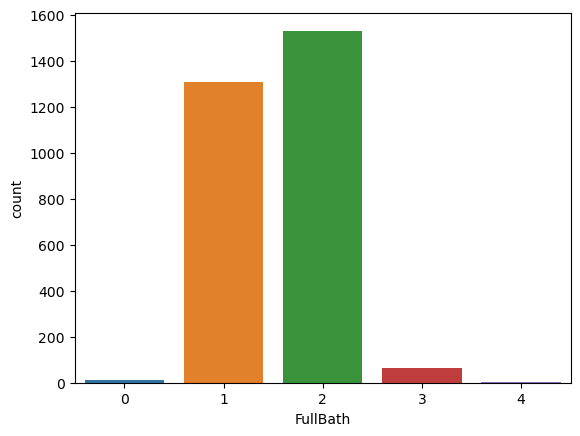

#################### HalfBath Counts - Ratio ####################
          HalfBath      Ratio
HalfBath                     
0             1834  62.829736
1             1060  36.313806
2               25   0.856458
#################### HalfBath Unique Variable Counts ####################
HalfBath : 3
#################### HalfBath Counts - Ratio Visualizing ####################


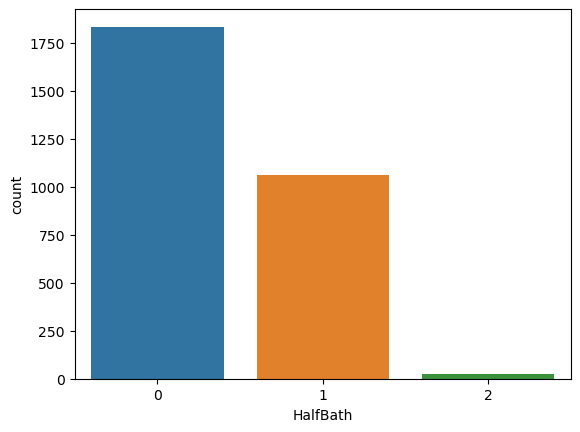

#################### BedroomAbvGr Counts - Ratio ####################
              BedroomAbvGr      Ratio
BedroomAbvGr                         
3                     1596  54.676259
2                      742  25.419664
4                      400  13.703323
1                      103   3.528606
5                       48   1.644399
6                       21   0.719424
0                        8   0.274066
8                        1   0.034258
#################### BedroomAbvGr Unique Variable Counts ####################
BedroomAbvGr : 8
#################### BedroomAbvGr Counts - Ratio Visualizing ####################


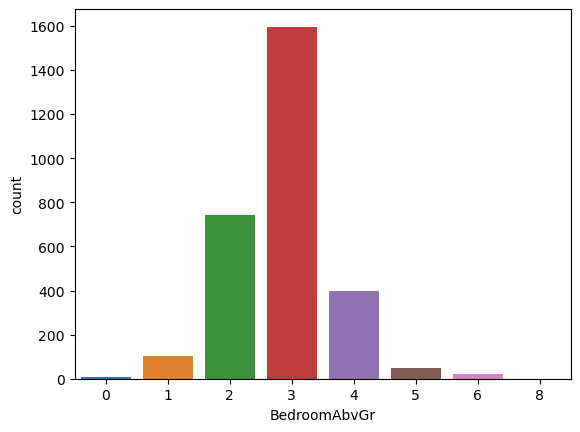

#################### KitchenAbvGr Counts - Ratio ####################
              KitchenAbvGr      Ratio
KitchenAbvGr                         
1                     2785  95.409387
2                      129   4.419322
0                        3   0.102775
3                        2   0.068517
#################### KitchenAbvGr Unique Variable Counts ####################
KitchenAbvGr : 4
#################### KitchenAbvGr Counts - Ratio Visualizing ####################


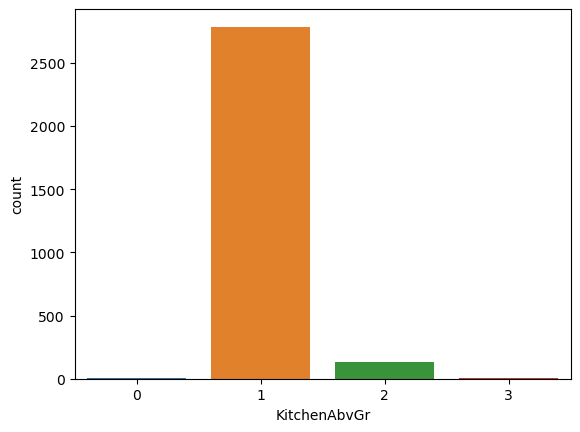

#################### Fireplaces Counts - Ratio ####################
            Fireplaces      Ratio
Fireplaces                       
0                 1420  48.646797
1                 1268  43.439534
2                  219   7.502569
3                   11   0.376841
4                    1   0.034258
#################### Fireplaces Unique Variable Counts ####################
Fireplaces : 5
#################### Fireplaces Counts - Ratio Visualizing ####################


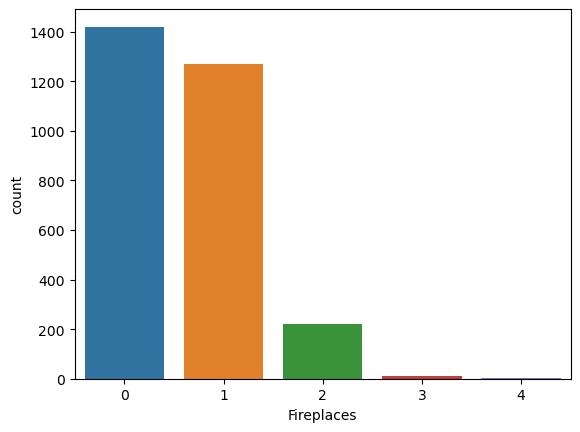

#################### GarageCars Counts - Ratio ####################
            GarageCars      Ratio
GarageCars                       
2.0               1594  54.607742
1.0                776  26.584447
3.0                374  12.812607
0.0                157   5.378554
4.0                 16   0.548133
5.0                  1   0.034258
#################### GarageCars Unique Variable Counts ####################
GarageCars : 6
#################### GarageCars Counts - Ratio Visualizing ####################


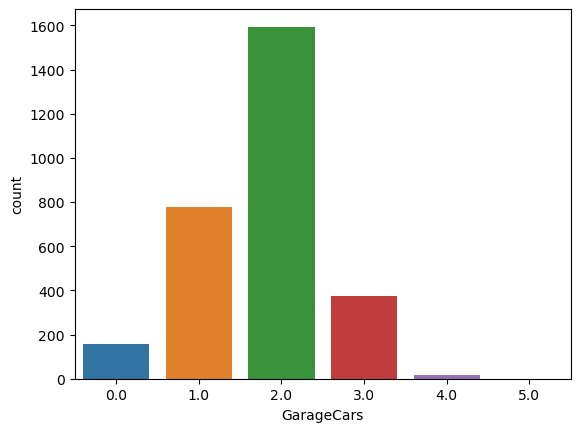

#################### Neighborhood Counts - Ratio ####################
              Neighborhood      Ratio
Neighborhood                         
NAmes                  443  15.176430
CollgCr                267   9.146968
OldTown                239   8.187736
Edwards                194   6.646112
Somerst                182   6.235012
NridgHt                166   5.686879
Gilbert                165   5.652621
Sawyer                 151   5.173004
NWAmes                 131   4.487838
SawyerW                125   4.282288
Mitchel                114   3.905447
BrkSide                108   3.699897
Crawfor                103   3.528606
IDOTRR                  93   3.186023
Timber                  72   2.466598
NoRidge                 71   2.432340
StoneBr                 51   1.747174
SWISU                   48   1.644399
ClearCr                 44   1.507366
MeadowV                 37   1.267557
BrDale                  30   1.027749
Blmngtn                 28   0.959233
Veenker           

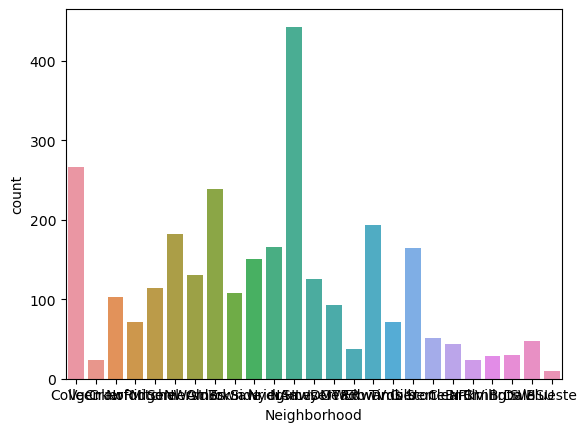

#################### MSSubClass Counts - Ratio ####################
            MSSubClass      Ratio
MSSubClass                       
20                1079  36.964714
60                 575  19.698527
50                 287   9.832134
120                182   6.235012
30                 139   4.761905
70                 128   4.385063
160                128   4.385063
80                 118   4.042480
90                 109   3.734156
190                 61   2.089757
85                  48   1.644399
75                  23   0.787941
45                  18   0.616650
180                 17   0.582391
40                   6   0.205550
150                  1   0.034258
#################### MSSubClass Unique Variable Counts ####################
MSSubClass : 16
#################### MSSubClass Counts - Ratio Visualizing ####################


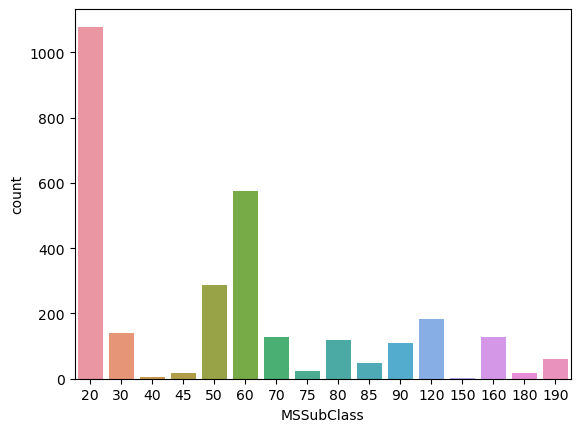

#################### OverallQual Counts - Ratio ####################
             OverallQual      Ratio
OverallQual                        
5                    825  28.263104
6                    731  25.042823
7                    600  20.554985
8                    342  11.716341
4                    226   7.742378
9                    107   3.665639
3                     40   1.370332
10                    31   1.062008
2                     13   0.445358
1                      4   0.137033
#################### OverallQual Unique Variable Counts ####################
OverallQual : 10
#################### OverallQual Counts - Ratio Visualizing ####################


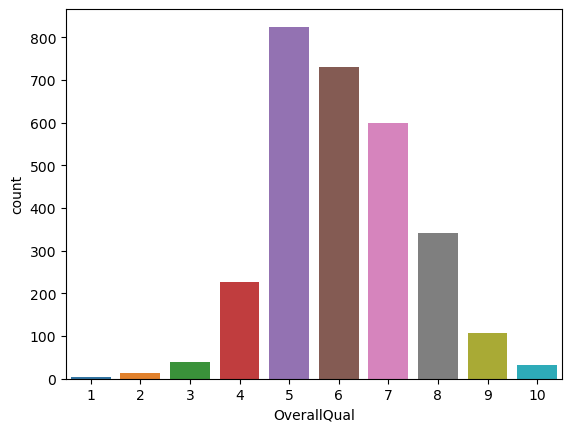

In [56]:
# applying the function:
for col in cat_cols:
    cat_summary(df,col,plot=True)

<a id = "6"></a>
### 4.2 Analysis of Numerical Variables

In [57]:
# defining a function to check summary of the numerical variables:

def num_summary(dataframe,col_name,plot = False, quantiles = [0.05, 0.10, 0.20, 0.50, 0.60, 0.80, 0.90, 0.95, 0.99]):
    if plot:
        dataframe[col_name].hist(bins=20)
        plt.xlabel(col_name)
        plt.title(col_name)
        plt.show(block = True)
    print("#################### QUANTILES ###############")
    print(dataframe[col_name].describe(quantiles).T, end= "\n\n")

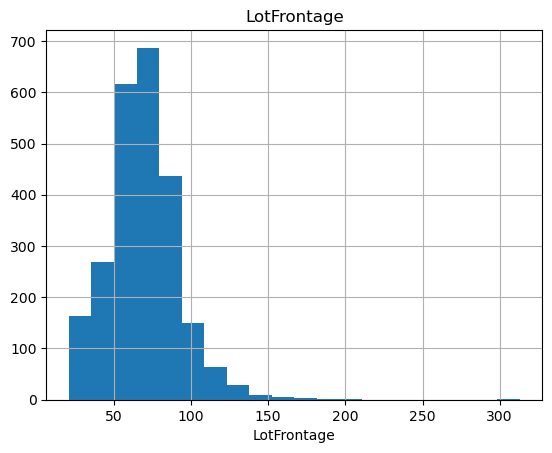

#################### QUANTILES ###############
count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
5%         32.000000
10%        43.000000
20%        53.000000
50%        68.000000
60%        73.000000
80%        84.000000
90%        95.000000
95%       107.000000
99%       135.680000
max       313.000000
Name: LotFrontage, dtype: float64



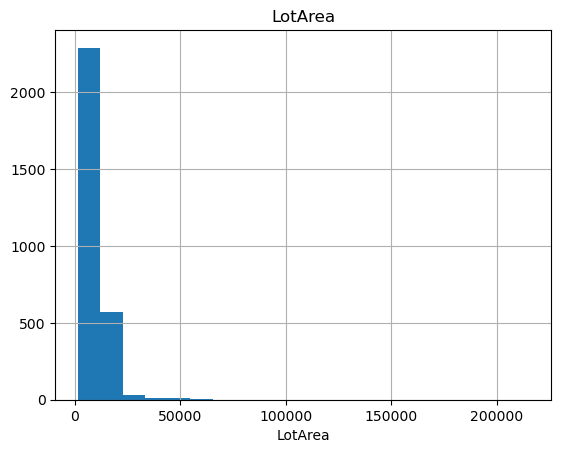

#################### QUANTILES ###############
count      2919.000000
mean      10168.114080
std        7886.996359
min        1300.000000
5%         3182.000000
10%        4922.400000
20%        7007.600000
50%        9453.000000
60%       10151.600000
80%       12203.800000
90%       14300.600000
95%       17142.900000
99%       33038.640000
max      215245.000000
Name: LotArea, dtype: float64



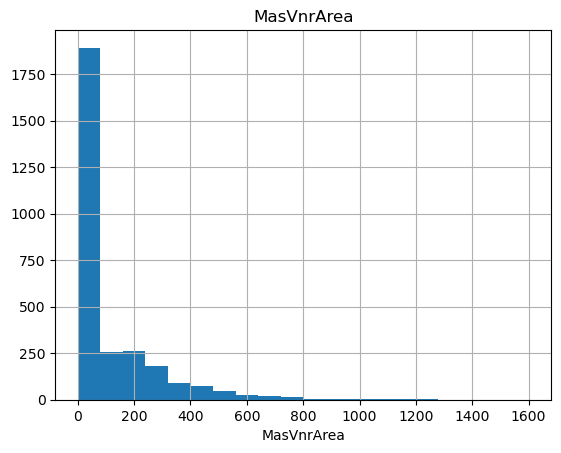

#################### QUANTILES ###############
count    2896.000000
mean      102.201312
std       179.334253
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
50%         0.000000
60%         0.000000
80%       202.000000
90%       325.500000
95%       466.500000
99%       771.050000
max      1600.000000
Name: MasVnrArea, dtype: float64



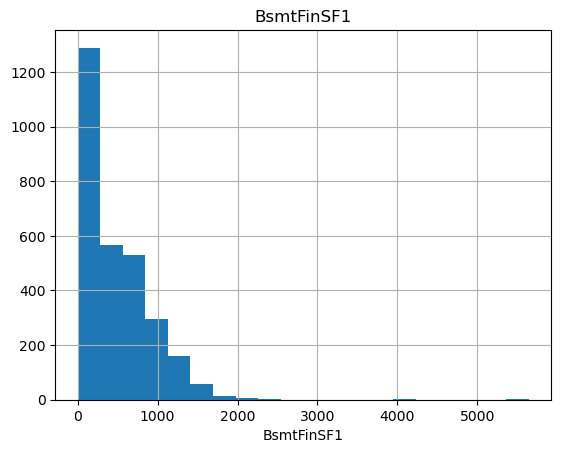

#################### QUANTILES ###############
count    2918.000000
mean      441.423235
std       455.610826
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
50%       368.500000
60%       515.200000
80%       812.000000
90%      1056.900000
95%      1274.000000
99%      1635.320000
max      5644.000000
Name: BsmtFinSF1, dtype: float64



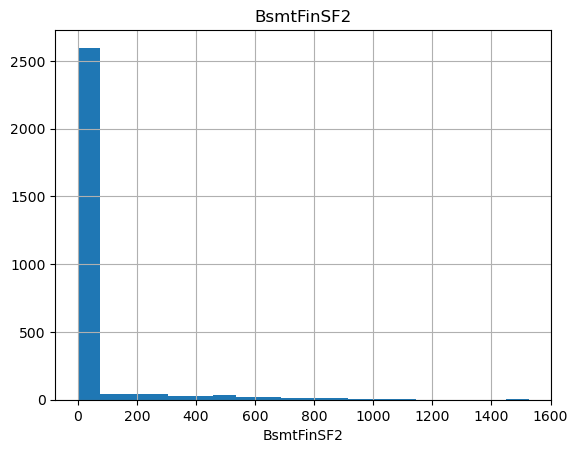

#################### QUANTILES ###############
count    2918.000000
mean       49.582248
std       169.205611
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
50%         0.000000
60%         0.000000
80%         0.000000
90%       125.600000
95%       435.000000
99%       874.660000
max      1526.000000
Name: BsmtFinSF2, dtype: float64



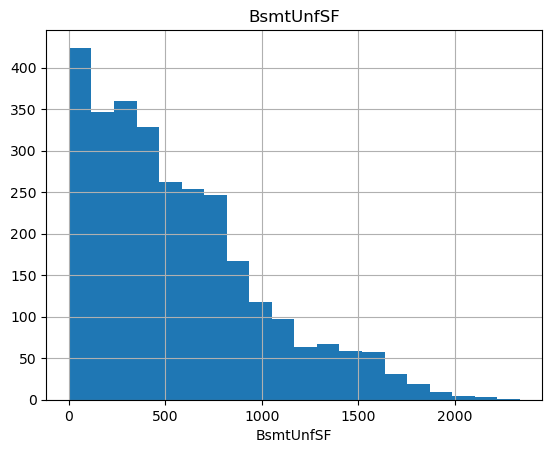

#################### QUANTILES ###############
count    2918.000000
mean      560.772104
std       439.543659
min         0.000000
5%          0.000000
10%        56.000000
20%       174.000000
50%       467.000000
60%       595.000000
80%       892.600000
90%      1212.600000
95%      1474.900000
99%      1776.490000
max      2336.000000
Name: BsmtUnfSF, dtype: float64



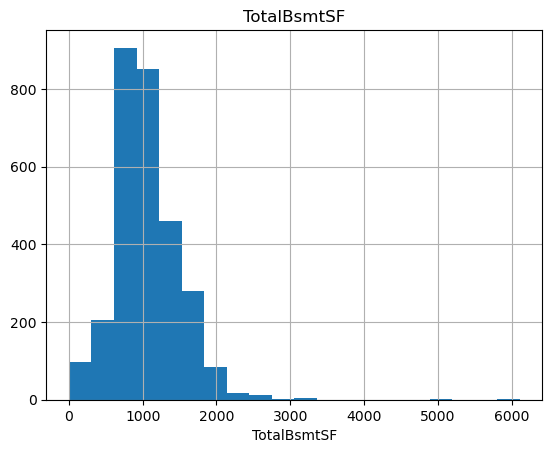

#################### QUANTILES ###############
count    2918.000000
mean     1051.777587
std       440.766258
min         0.000000
5%        455.250000
10%       600.000000
20%       741.000000
50%       989.500000
60%      1089.200000
80%      1392.000000
90%      1614.000000
95%      1776.150000
99%      2198.300000
max      6110.000000
Name: TotalBsmtSF, dtype: float64



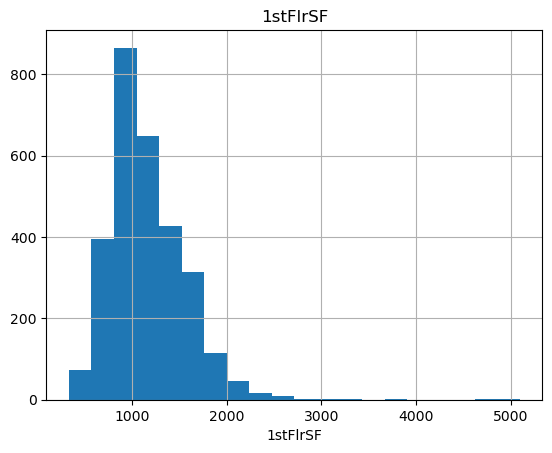

#################### QUANTILES ###############
count    2919.000000
mean     1159.581706
std       392.362079
min       334.000000
5%        665.900000
10%       744.800000
20%       847.000000
50%      1082.000000
60%      1180.000000
80%      1483.400000
90%      1675.000000
95%      1830.100000
99%      2288.020000
max      5095.000000
Name: 1stFlrSF, dtype: float64



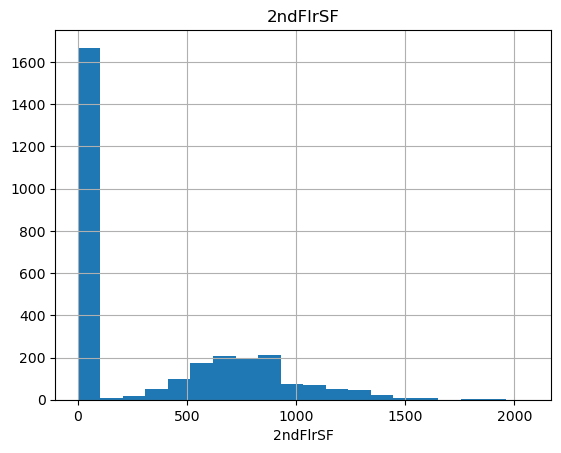

#################### QUANTILES ###############
count    2919.000000
mean      336.483727
std       428.701456
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
50%         0.000000
60%       427.400000
80%       770.800000
90%       925.000000
95%      1131.200000
99%      1400.200000
max      2065.000000
Name: 2ndFlrSF, dtype: float64



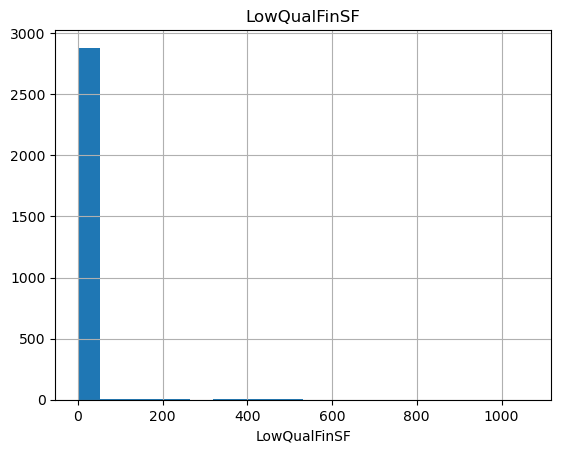

#################### QUANTILES ###############
count    2919.000000
mean        4.694416
std        46.396825
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
50%         0.000000
60%         0.000000
80%         0.000000
90%         0.000000
95%         0.000000
99%       153.840000
max      1064.000000
Name: LowQualFinSF, dtype: float64



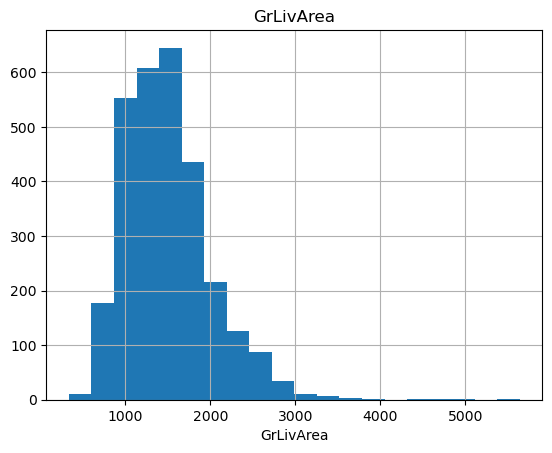

#################### QUANTILES ###############
count    2919.000000
mean     1500.759849
std       506.051045
min       334.000000
5%        861.000000
10%       923.800000
20%      1064.600000
50%      1444.000000
60%      1560.000000
80%      1838.400000
90%      2153.200000
95%      2464.200000
99%      2935.720000
max      5642.000000
Name: GrLivArea, dtype: float64



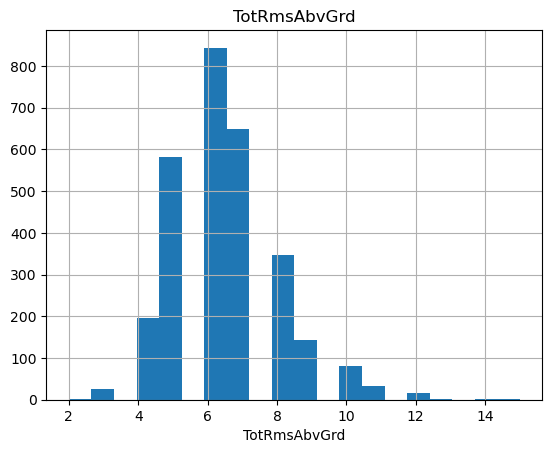

#################### QUANTILES ###############
count    2919.000000
mean        6.451524
std         1.569379
min         2.000000
5%          4.000000
10%         5.000000
20%         5.000000
50%         6.000000
60%         7.000000
80%         8.000000
90%         8.000000
95%         9.000000
99%        11.000000
max        15.000000
Name: TotRmsAbvGrd, dtype: float64



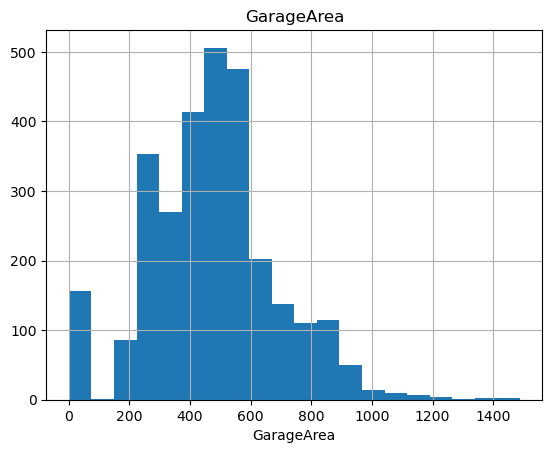

#################### QUANTILES ###############
count    2918.000000
mean      472.874572
std       215.394815
min         0.000000
5%          0.000000
10%       240.000000
20%       296.000000
50%       480.000000
60%       513.000000
80%       621.000000
90%       758.000000
95%       856.150000
99%      1019.490000
max      1488.000000
Name: GarageArea, dtype: float64



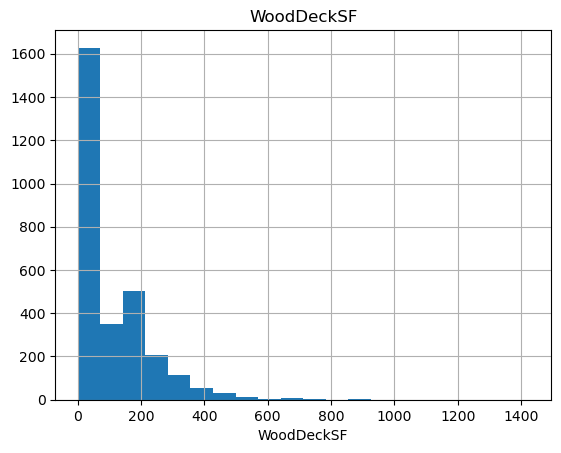

#################### QUANTILES ###############
count    2919.000000
mean       93.709832
std       126.526589
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
50%         0.000000
60%       100.000000
80%       192.000000
90%       257.000000
95%       328.000000
99%       500.820000
max      1424.000000
Name: WoodDeckSF, dtype: float64



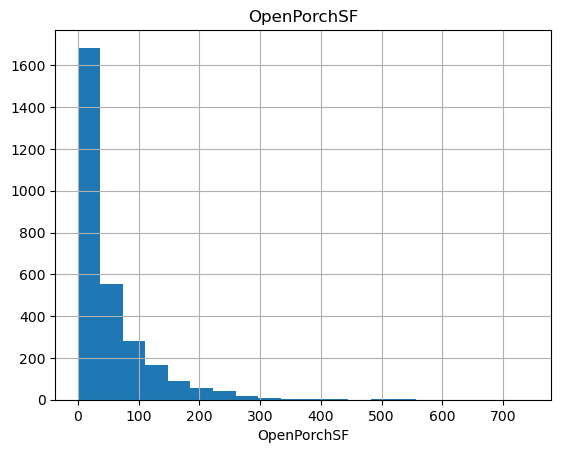

#################### QUANTILES ###############
count    2919.000000
mean       47.486811
std        67.575493
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
50%        26.000000
60%        40.000000
80%        85.000000
90%       131.200000
95%       183.100000
99%       284.460000
max       742.000000
Name: OpenPorchSF, dtype: float64



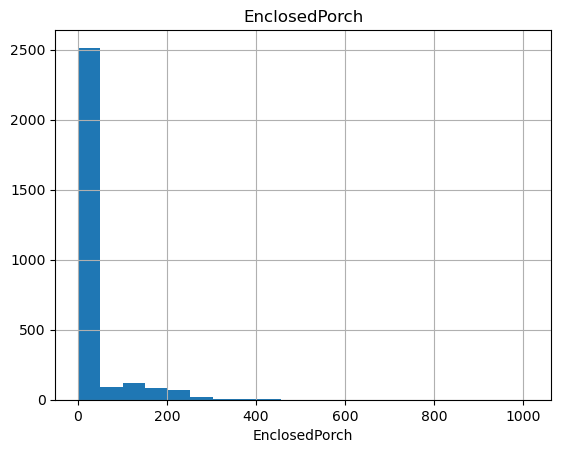

#################### QUANTILES ###############
count    2919.000000
mean       23.098321
std        64.244246
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
50%         0.000000
60%         0.000000
80%         0.000000
90%       112.000000
95%       176.000000
99%       264.000000
max      1012.000000
Name: EnclosedPorch, dtype: float64



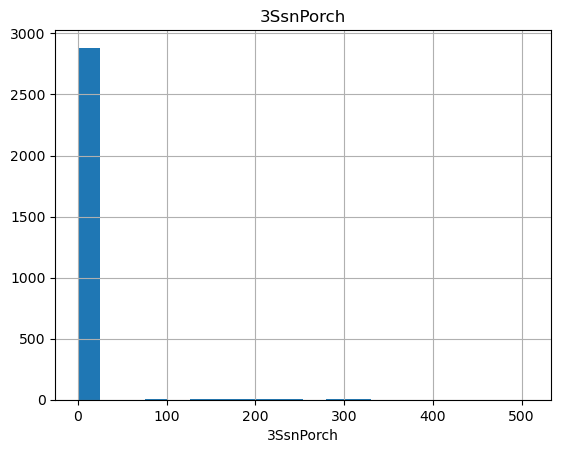

#################### QUANTILES ###############
count    2919.000000
mean        2.602261
std        25.188169
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
50%         0.000000
60%         0.000000
80%         0.000000
90%         0.000000
95%         0.000000
99%       144.000000
max       508.000000
Name: 3SsnPorch, dtype: float64



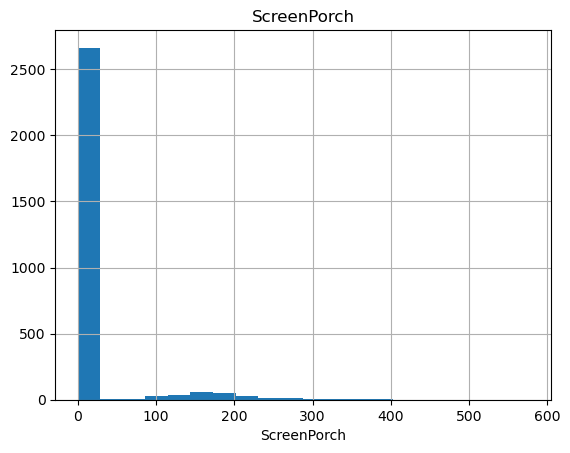

#################### QUANTILES ###############
count    2919.000000
mean       16.062350
std        56.184365
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
50%         0.000000
60%         0.000000
80%         0.000000
90%         0.000000
95%       161.000000
99%       259.820000
max       576.000000
Name: ScreenPorch, dtype: float64



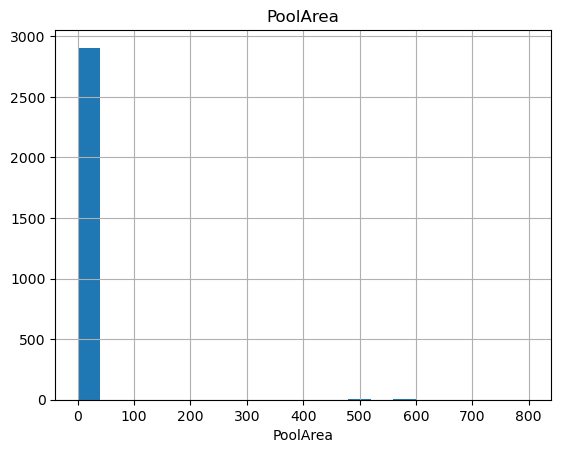

#################### QUANTILES ###############
count    2919.000000
mean        2.251799
std        35.663946
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
50%         0.000000
60%         0.000000
80%         0.000000
90%         0.000000
95%         0.000000
99%         0.000000
max       800.000000
Name: PoolArea, dtype: float64



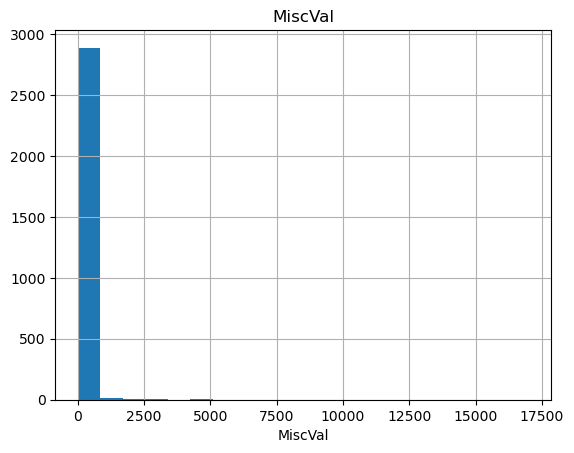

#################### QUANTILES ###############
count     2919.000000
mean        50.825968
std        567.402211
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
50%          0.000000
60%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
99%        982.000000
max      17000.000000
Name: MiscVal, dtype: float64



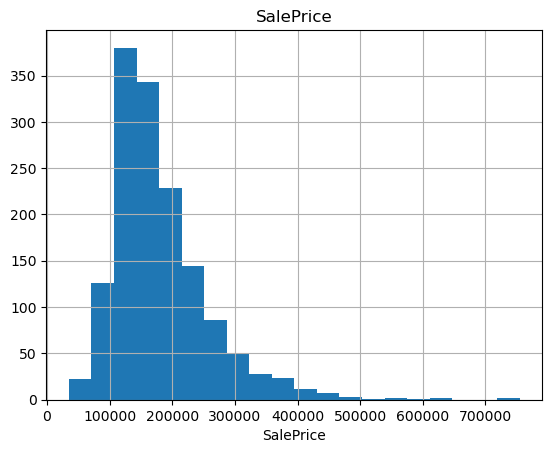

#################### QUANTILES ###############
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
5%        88000.000000
10%      106475.000000
20%      124000.000000
50%      163000.000000
60%      179280.000000
80%      230000.000000
90%      278000.000000
95%      326100.000000
99%      442567.010000
max      755000.000000
Name: SalePrice, dtype: float64



In [59]:
# applying the function:
for col in num_cols:
    num_summary(df, col , plot = True)

<a id = "7"></a>
### 4.3 Target Variable Analysis

In [60]:
# Target - Categorical Variables

In [61]:
# defining a function to check summary of the target and categorical variables:

def target_summary_with_cat(dataframe,target,categorical_col):
    for col in categorical_col:
        print(f"################ Target Mean by {col} #################", end ="\n\n")
        print(pd.DataFrame({f"{target}_Mean": dataframe.groupby(col)[target].mean()}), end = "\n\n\n")

In [62]:
# applying the function:

target_summary_with_cat(df, "SalePrice", cat_cols)

################ Target Mean by MSZoning #################

          SalePrice_Mean
MSZoning                
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191004.994787
RM         126316.830275


################ Target Mean by Street #################

        SalePrice_Mean
Street                
Grvl     130190.500000
Pave     181130.538514


################ Target Mean by Alley #################

       SalePrice_Mean
Alley                
Grvl    122219.080000
Pave    168000.585366


################ Target Mean by LotShape #################

          SalePrice_Mean
LotShape                
IR1        206101.665289
IR2        239833.365854
IR3        216036.500000
Reg        164754.818378


################ Target Mean by LandContour #################

             SalePrice_Mean
LandContour                
Bnk           143104.079365
HLS           231533.940000
Low           203661.111111
Lvl           180183.746758


################ Ta

In [63]:
# Target - Numerical Variables

In [64]:
# defining a function to check summary of the target and numerical variables:

def analyze_continuous_target(df,target,numeric_cols):
    for col in numeric_cols:
        plt.figure(figsize=(10, 5))
        sns.regplot(x=df[col], y=df[target], line_kws={"color": "red"})
        plt.title(f'{target} vs {col}')
        plt.xlabel(col)
        plt.ylabel(target)
        plt.grid(True)
        plt.show()

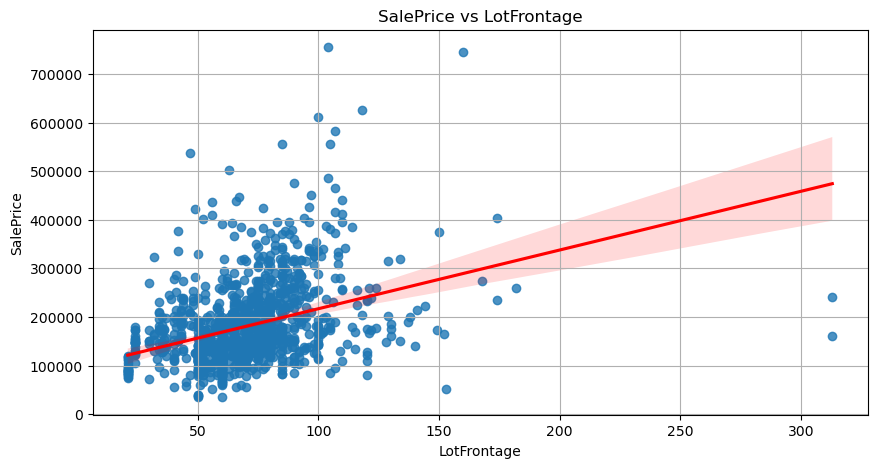

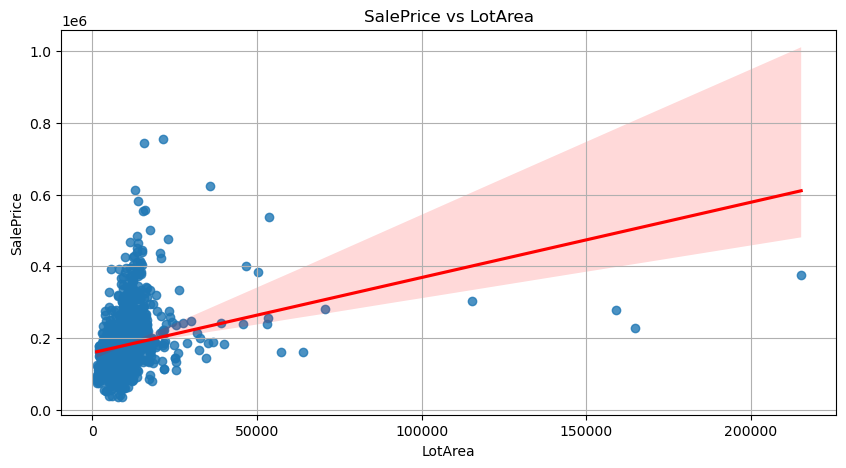

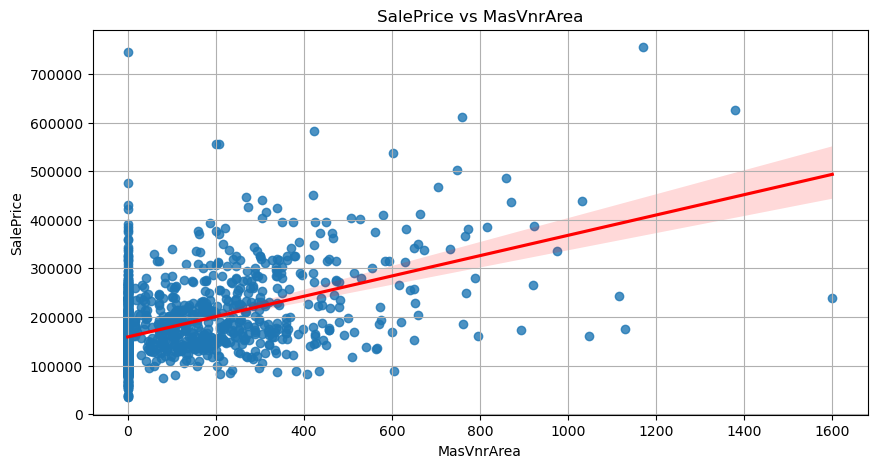

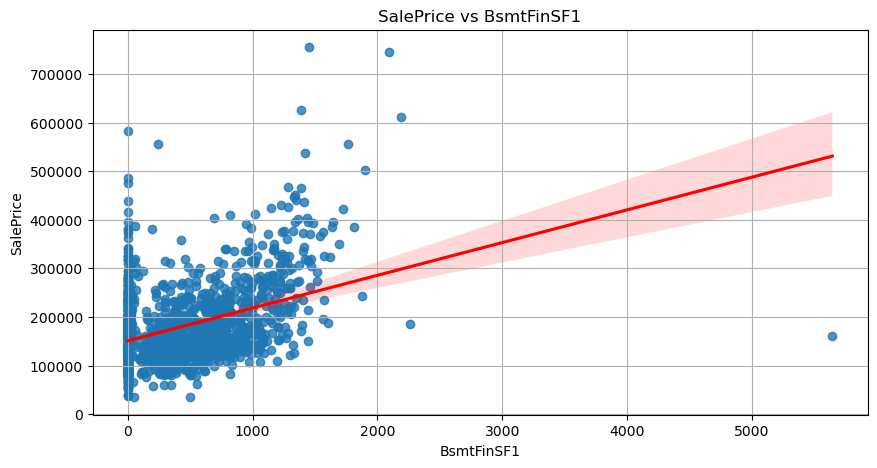

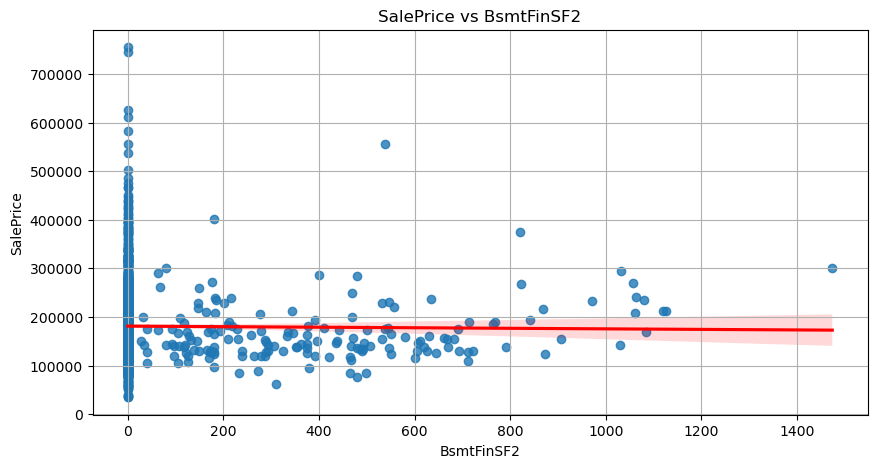

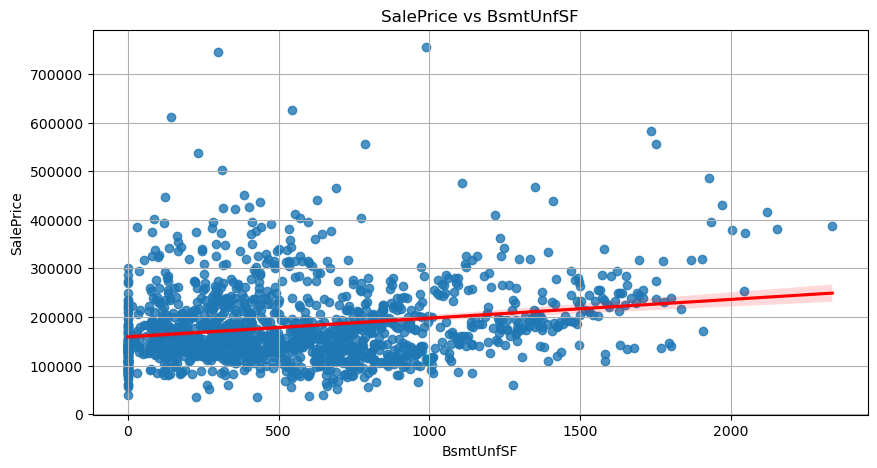

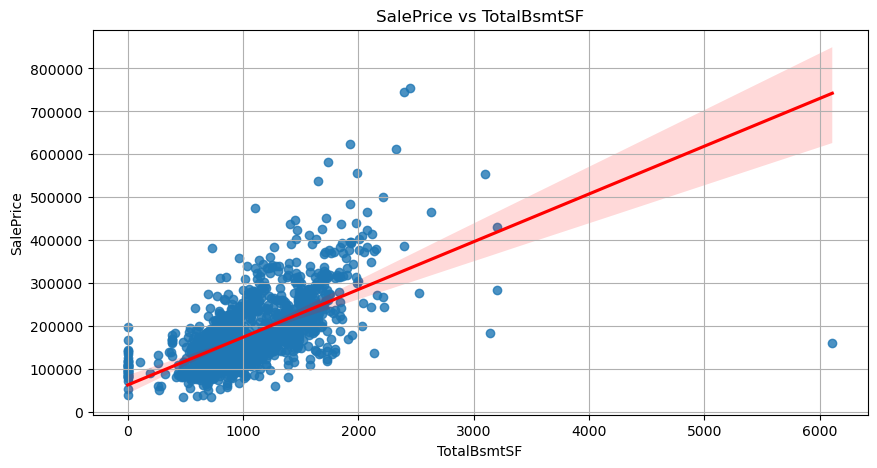

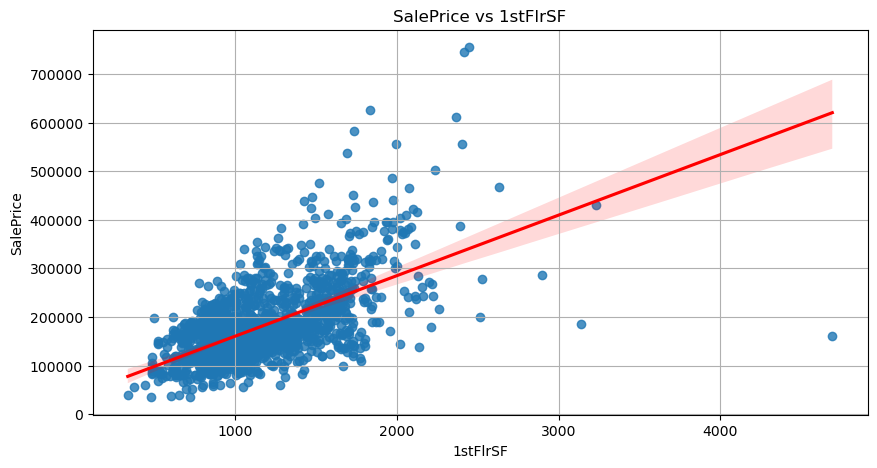

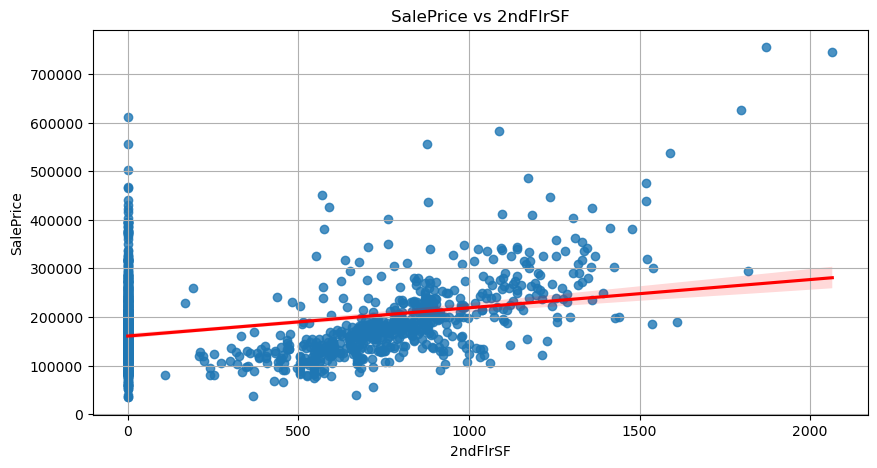

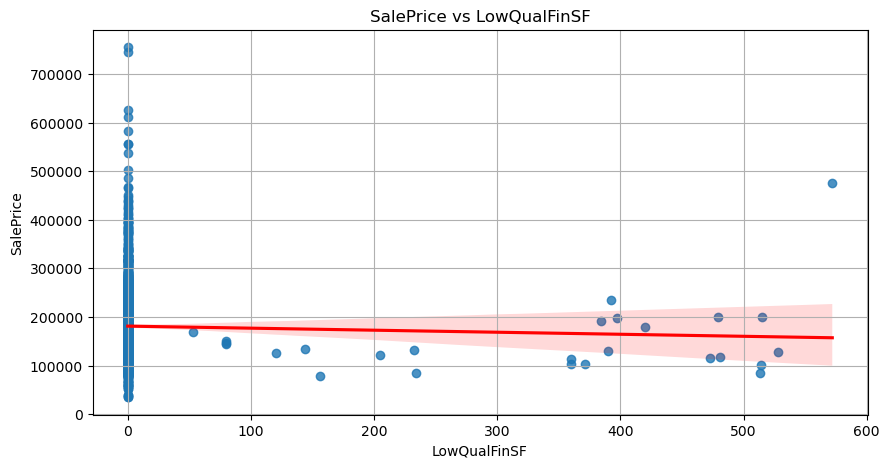

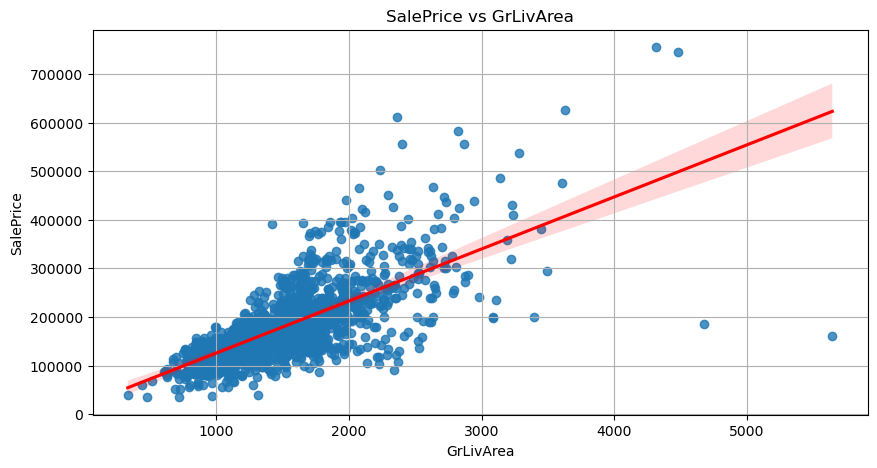

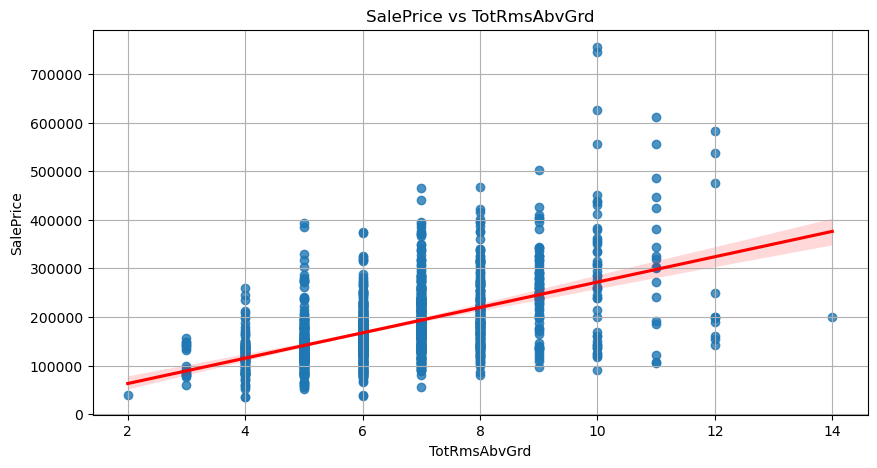

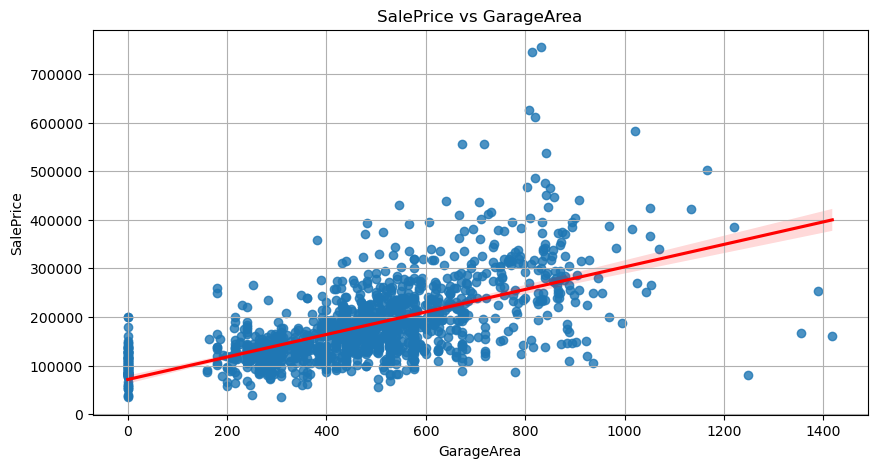

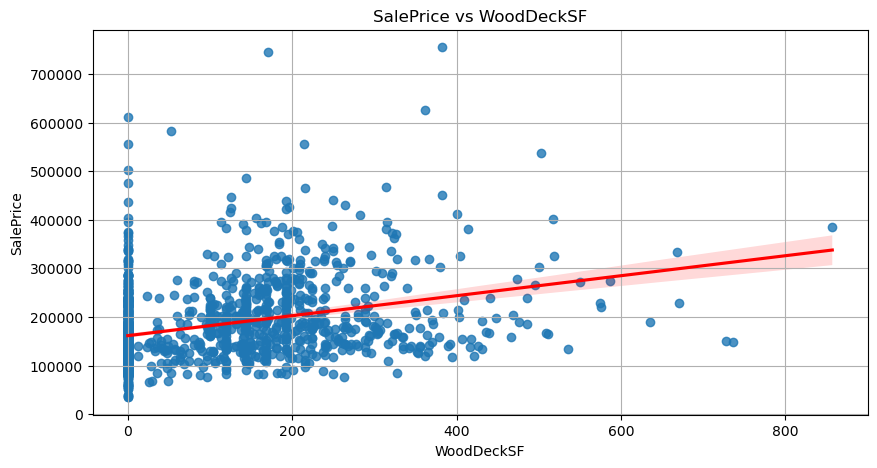

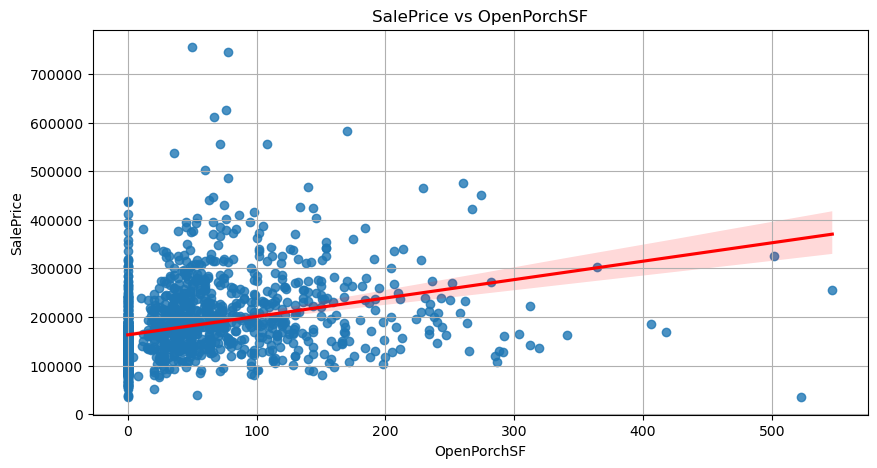

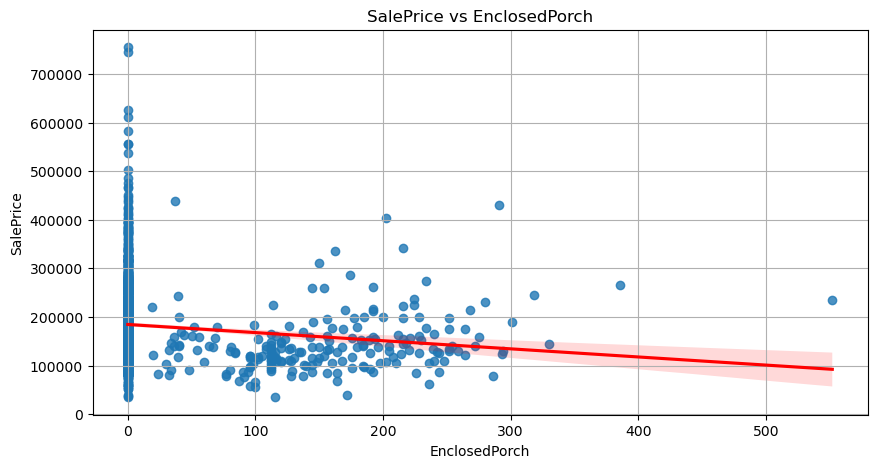

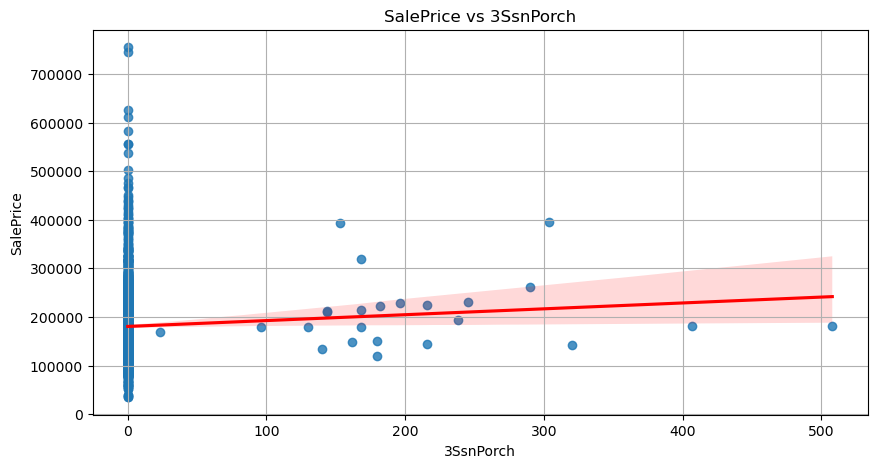

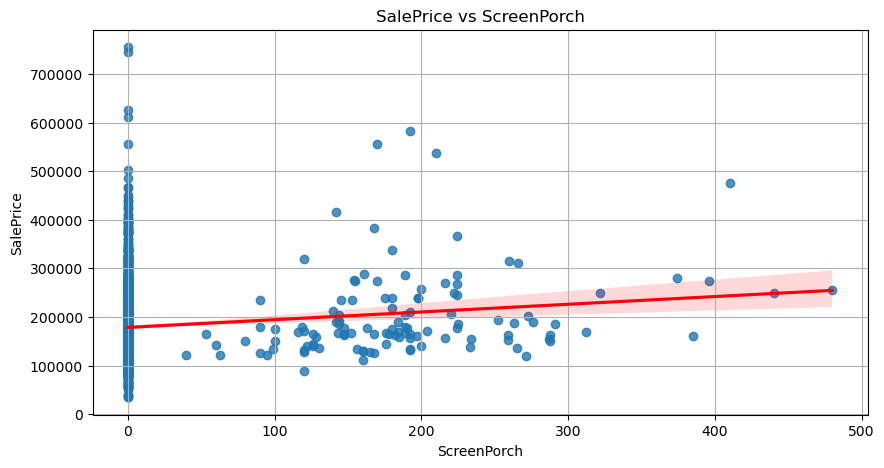

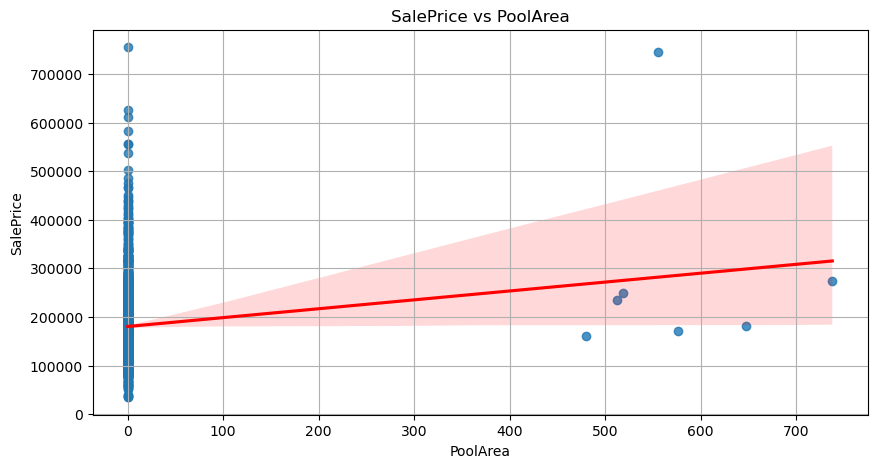

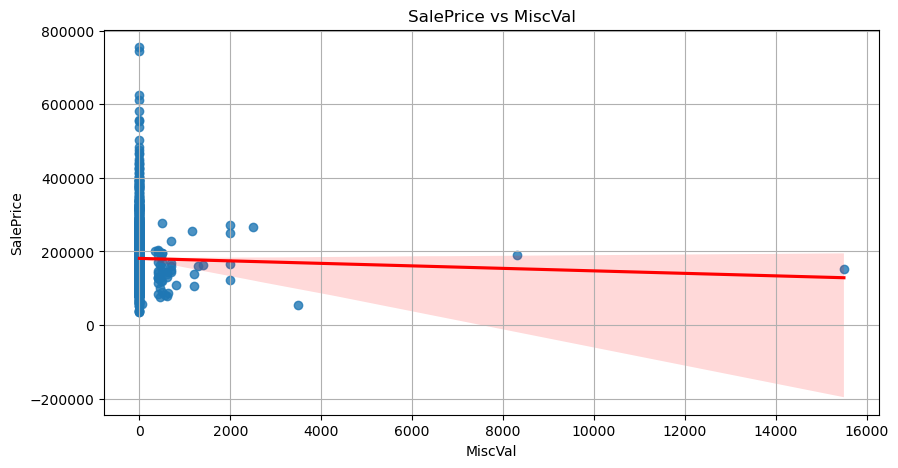

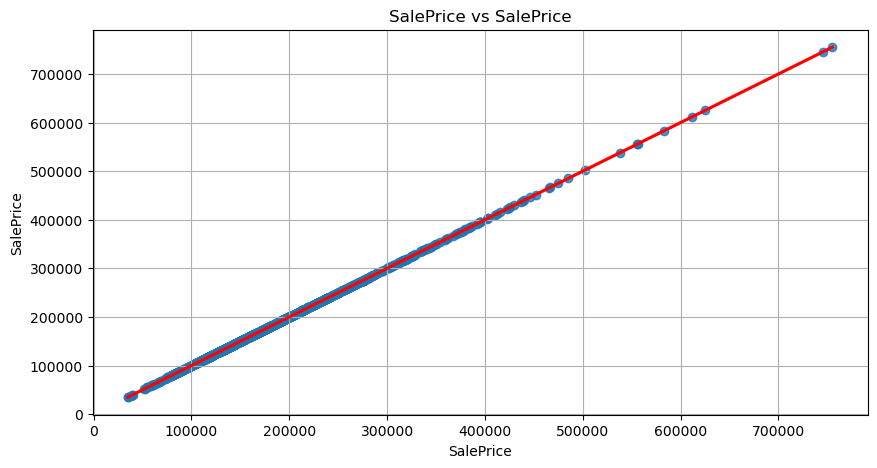

In [65]:
# applying the function:

analyze_continuous_target(df,"SalePrice",num_cols)

In [66]:
# visualisation the date columns:

def analyze_date_target(df, year_columns, month_columns, target):
    # Year & Month formats:
    for col in year_columns:
        pd.to_datetime(df[col]).dt.year
        
    for col in month_columns:
        pd.to_datetime(df[col]).dt.month

    # Visualisation: 
    if len(year_columns) > 0:
        for col in year_columns:
            # Calculating annual average sales prices:
            yearly_avg = df.groupby(col)[target].mean().reset_index()
            # Creating the chart:
            plt.figure(figsize=(10, 5))
            plt.plot(yearly_avg[col], yearly_avg[target], marker='o', linestyle='-')
            plt.title(f'Average {target} by Year')
            plt.xlabel('Year')
            plt.ylabel(f'Average {target}')
            plt.grid(True)
            plt.show()
            
    if len(month_columns) > 0:
        for col in month_columns:
            # Calculating monthly average sales prices:
            monthly_avg = df.groupby(col)[target].mean().reset_index()
            # Creating the chart:
            plt.figure(figsize=(10, 5))
            plt.plot(monthly_avg[col], monthly_avg[target], marker='o', linestyle='-')
            plt.title(f'Average {target} by Month')
            plt.xlabel('Month')
            plt.ylabel(f'Average {target}')
            plt.grid(True)
            plt.show()

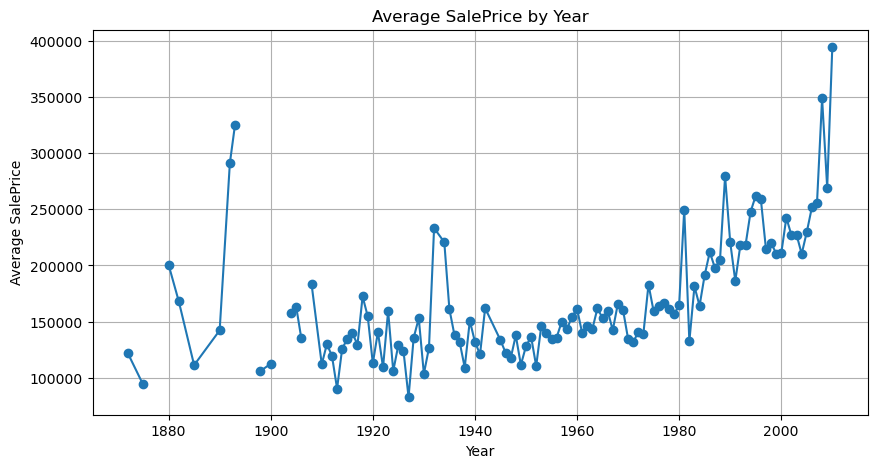

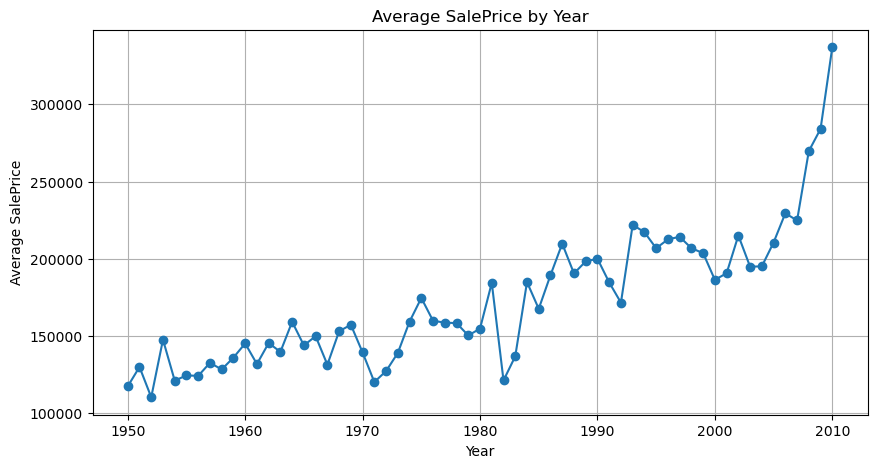

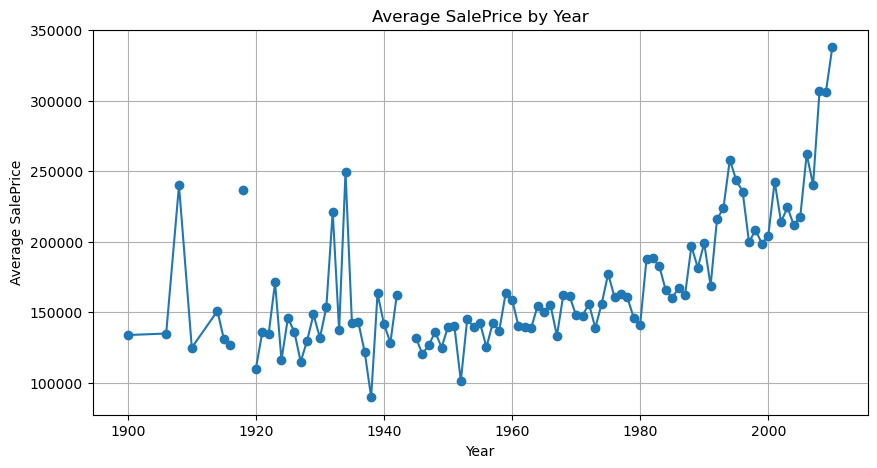

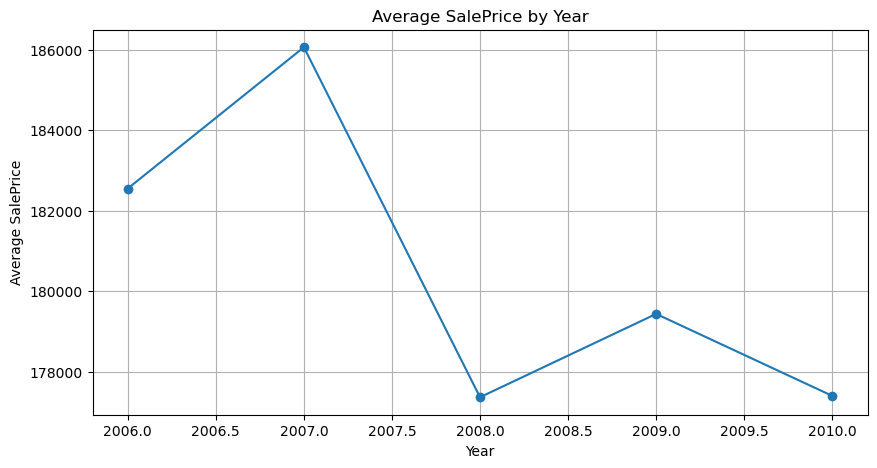

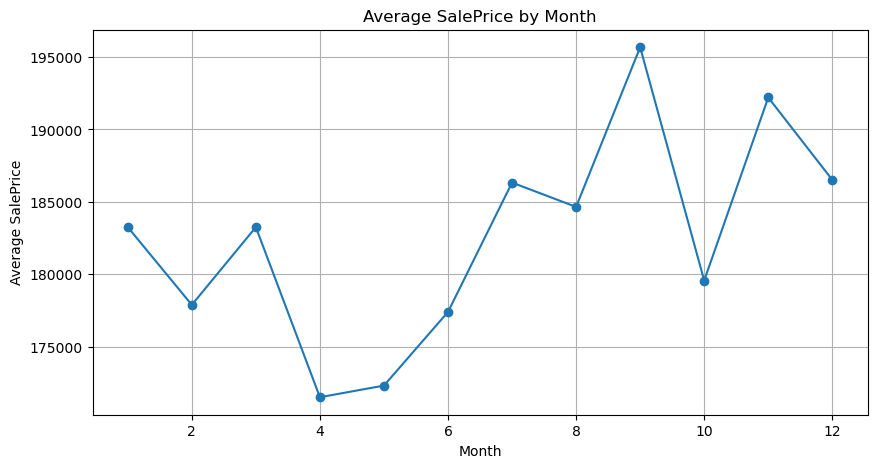

In [67]:
# applying the function:

analyze_date_target(df,['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'],['MoSold'],"SalePrice")

<a id = "8"></a>
### 4.4 Outlier Analysis

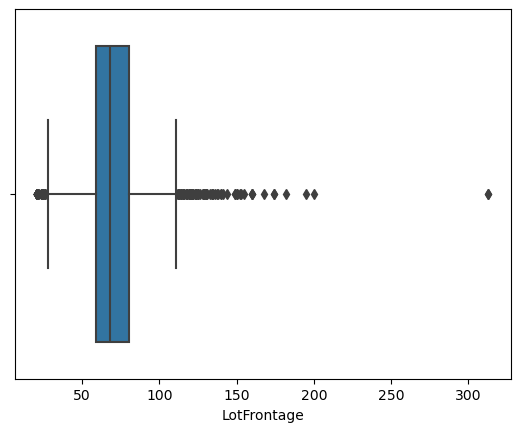

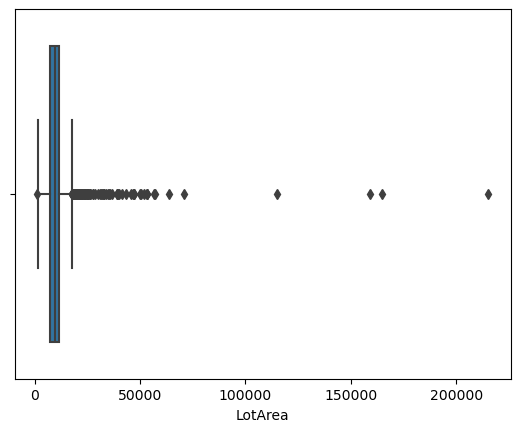

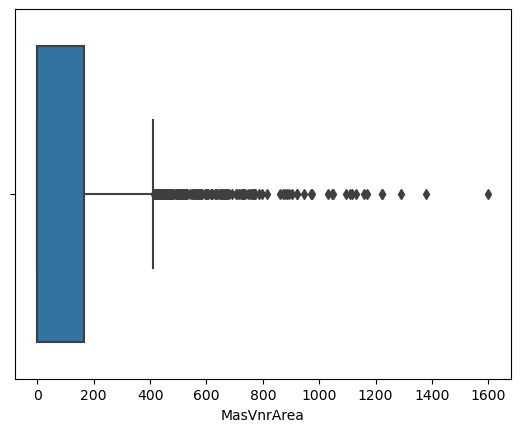

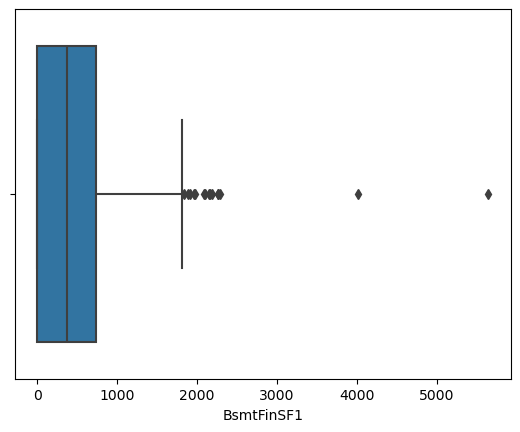

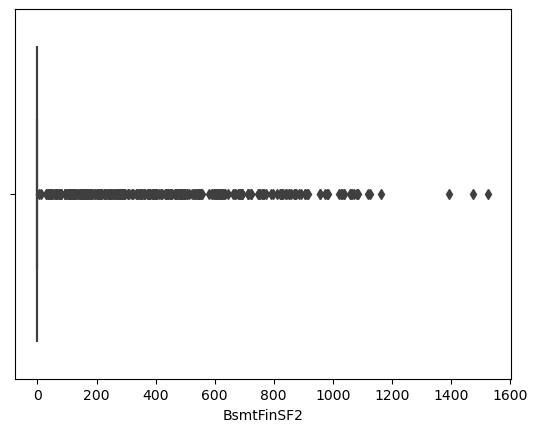

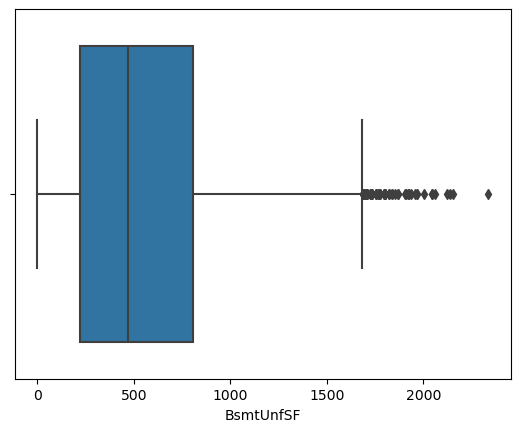

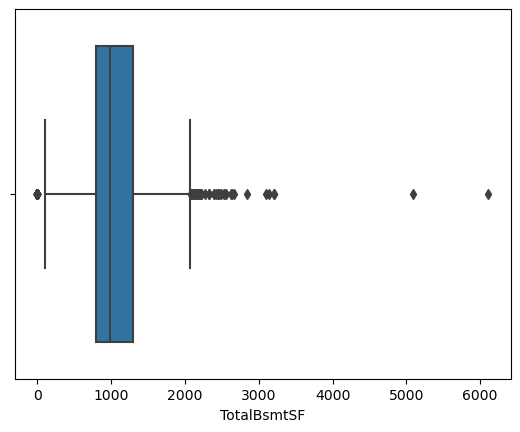

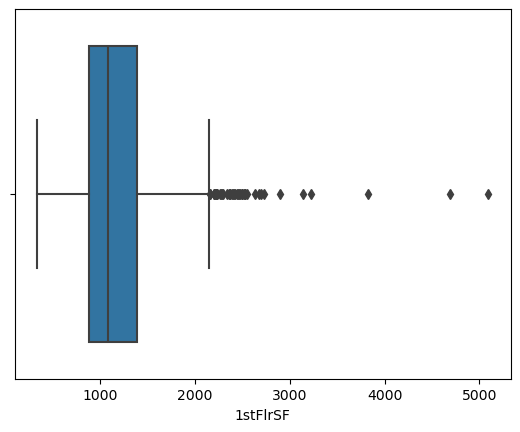

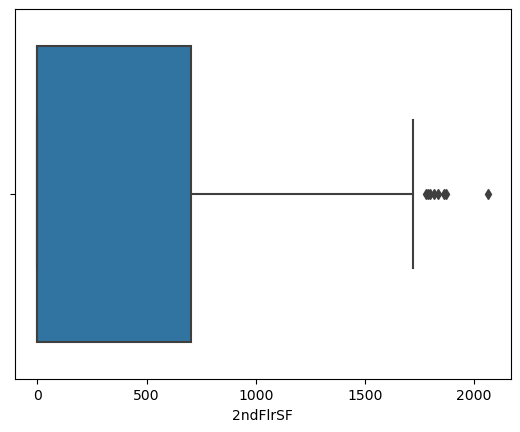

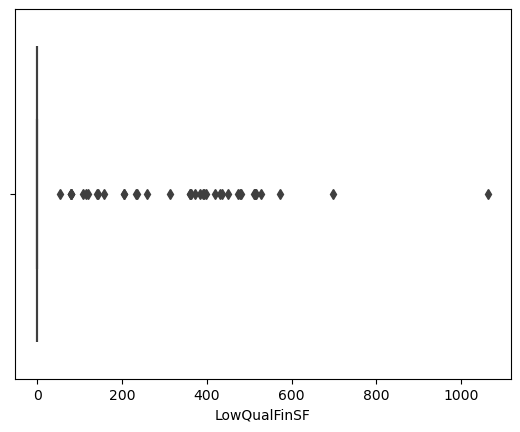

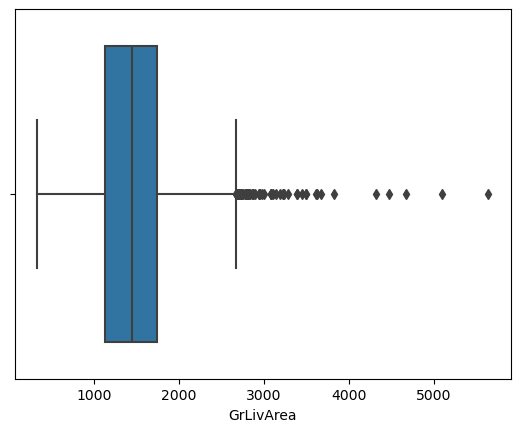

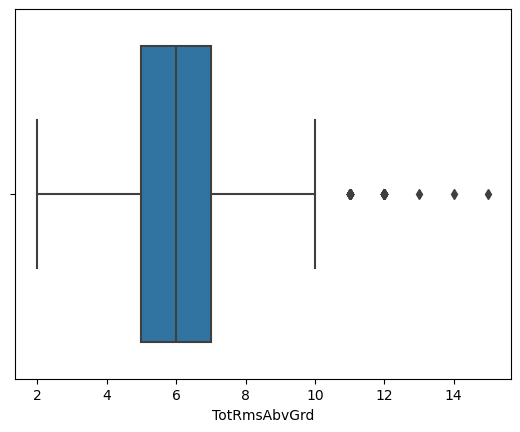

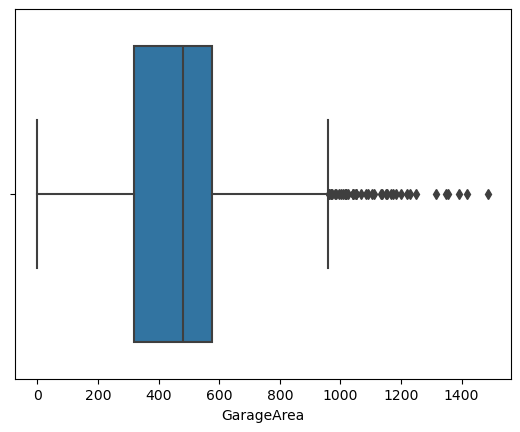

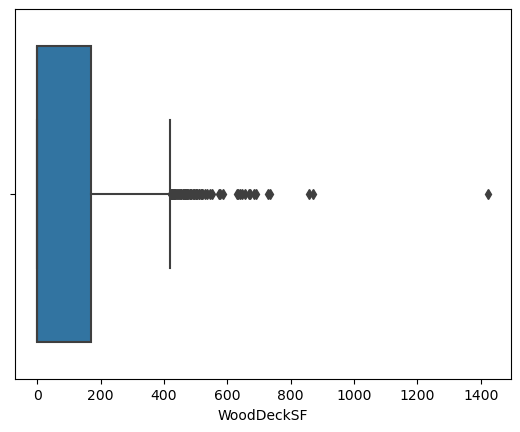

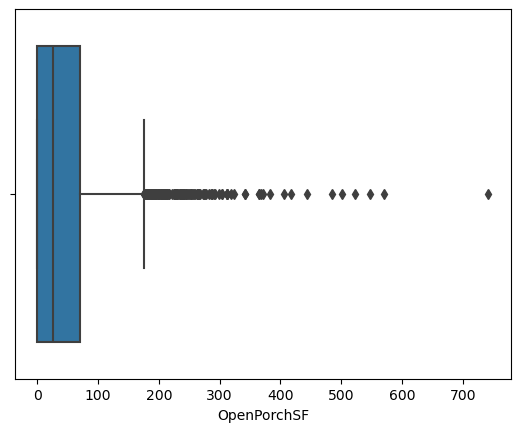

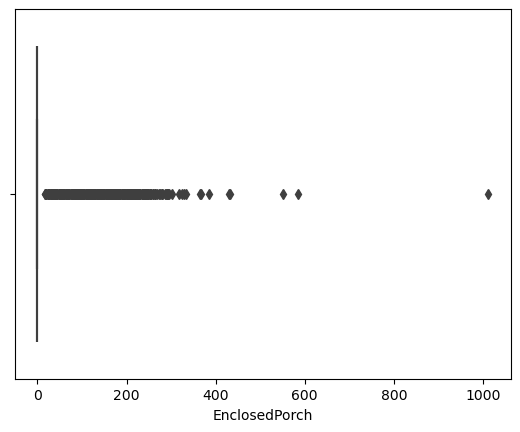

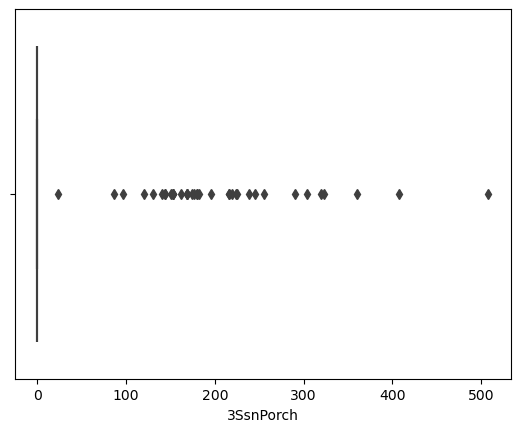

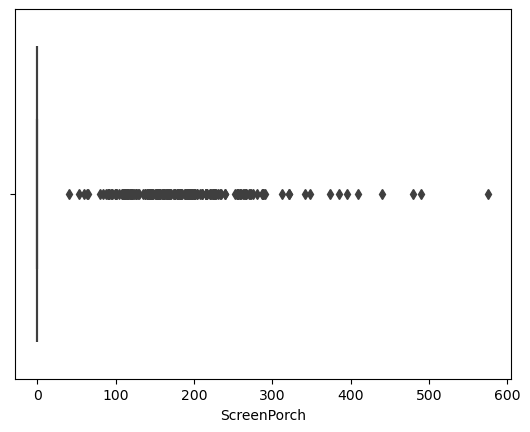

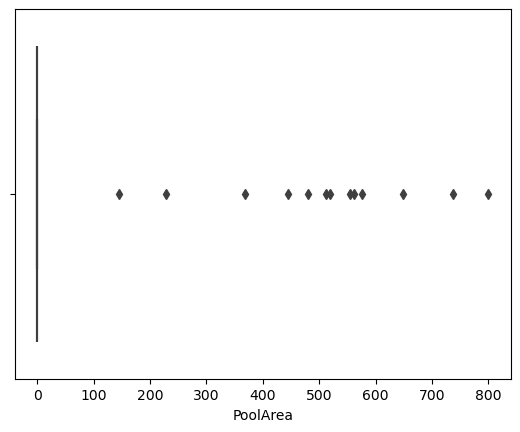

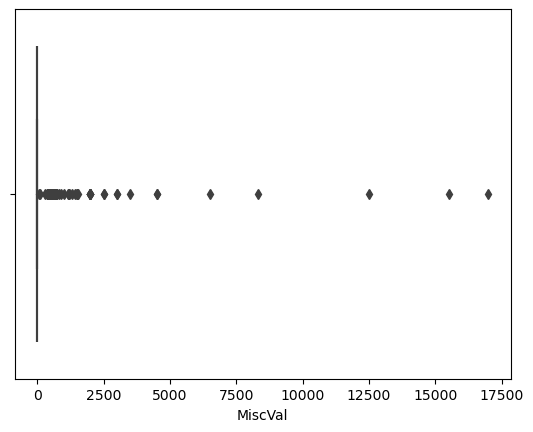

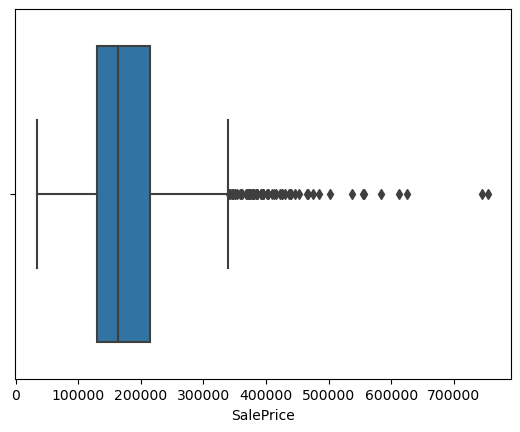

In [68]:
# outlier analysis using graphical techniques:

for col in num_cols:
    sns.boxplot(x= df[col])
    plt.show()

In [69]:
# calculating ouitlier thresholds:

def outlier_thresholds(dataframe,col_name,q1=0.01,q3=0.99):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5*interquantile_range
    low_limit = quartile1 - 1.5*interquantile_range
    return low_limit, up_limit

In [70]:
# checking outlier in the dataframe:

def check_outlier(dataframe, col_name):
    if pd.api.types.is_numeric_dtype(dataframe[col_name]):
        low, up = outlier_thresholds(dataframe, col_name)
        return (dataframe[col_name] > up) | (dataframe[col_name] < low)
    else:
        return pd.Series(False, index=dataframe.index)

In [71]:
#checking results:
check_outlier(df, num_cols).head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [72]:
#defining a function to check columns outliers:

def check_all_columns_outliers(dataframe,num_cols):
    results = {}
    for col in num_cols:
        results[col] = check_outlier(dataframe, col).any() if pd.api.types.is_numeric_dtype(dataframe[col]) else False
    return results

In [73]:
#checking results:

check_all_columns_outliers(df,num_cols)

{'LotFrontage': True,
 'LotArea': True,
 'MasVnrArea': False,
 'BsmtFinSF1': True,
 'BsmtFinSF2': False,
 'BsmtUnfSF': False,
 'TotalBsmtSF': True,
 '1stFlrSF': True,
 '2ndFlrSF': False,
 'LowQualFinSF': True,
 'GrLivArea': False,
 'TotRmsAbvGrd': False,
 'GarageArea': False,
 'WoodDeckSF': True,
 'OpenPorchSF': True,
 'EnclosedPorch': True,
 '3SsnPorch': True,
 'ScreenPorch': False,
 'PoolArea': True,
 'MiscVal': True,
 'SalePrice': False}

In [74]:
# listing columns based on outlier information:

def show_column_names_with_outliers_info(dataframe,col_list):
    print("################# Numeric Columns Outlier Thresholds: Low & Up Limit  #####################")
    for col in col_list:
        low, up = outlier_thresholds(dataframe,col)
        print(f"{col} : low: {low}, up: {up}",end ="\n")
    print(end="\n\n")
    no_outliers = []
    have_outliers = []
    for col,value in check_all_columns_outliers(dataframe,col_list).items():
        if value:
            have_outliers.append(col)
        else:
            no_outliers.append(col)
    print("################# Numeric Columns Have Outliers  #####################")
    print(have_outliers)
    print(f"count_columns: {len(have_outliers)}", end="\n\n")
    print("################# Numeric Columns Have NOT Outliers #####################")
    print(no_outliers)
    print(f"count_columns: {len(no_outliers)}", end="\n\n")
    return have_outliers,no_outliers


In [75]:
# applying the function:

have_outliers,no_outliers = show_column_names_with_outliers_info(df,num_cols)

################# Numeric Columns Outlier Thresholds: Low & Up Limit  #####################
LotFrontage : low: -151.01999999999975, up: 307.6999999999996
LotArea : low: -45357.96000000011, up: 80076.60000000018
MasVnrArea : low: -1156.5750000000003, up: 1927.6250000000005
BsmtFinSF1 : low: -2452.9799999999996, up: 4088.2999999999993
BsmtFinSF2 : low: -1311.9899999999998, up: 2186.6499999999996
BsmtUnfSF : low: -2664.7349999999997, up: 4441.224999999999
TotalBsmtSF : low: -3297.449999999999, up: 5495.749999999998
1stFlrSF : low: -2132.0300000000025, up: 4940.050000000005
2ndFlrSF : low: -2100.3000000000025, up: 3500.500000000004
LowQualFinSF : low: -230.76000000000295, up: 384.6000000000049
GrLivArea : low: -2715.030000000011, up: 6326.170000000018
TotRmsAbvGrd : low: -6.5, up: 21.5
GarageArea : low: -1529.2349999999997, up: 2548.7249999999995
WoodDeckSF : low: -751.2300000000002, up: 1252.0500000000004
OpenPorchSF : low: -426.69000000000074, up: 711.1500000000012
EnclosedPorch : low: -

<a id = "9"></a>
### 4.5 Correlation Analysis

In [76]:
# calculating correlation :

corr = df[num_cols].corr()
corr

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
LotFrontage       1.000000  0.489896    0.221079    0.219408    0.047431   
LotArea           0.489896  1.000000    0.125596    0.194031    0.084059   
MasVnrArea        0.221079  0.125596    1.000000    0.303490   -0.015645   
BsmtFinSF1        0.219408  0.194031    0.303490    1.000000   -0.055045   
BsmtFinSF2        0.047431  0.084059   -0.015645   -0.055045    1.000000   
BsmtUnfSF         0.113714  0.021362    0.090163   -0.477404   -0.238241   
TotalBsmtSF       0.354822  0.254138    0.397240    0.536467    0.089410   
1stFlrSF          0.458247  0.332460    0.395834    0.458092    0.084330   
2ndFlrSF          0.026545  0.031515    0.121014   -0.162301   -0.097744   
LowQualFinSF      0.004894  0.000554   -0.057912   -0.066028   -0.004923   
GrLivArea         0.382462  0.284519    0.402994    0.211669   -0.017872   
TotRmsAbvGrd      0.349513  0.213802    0.278228    0.052141   -0.048423   
GarageArea        0.359786  0.213251    0.374061    0.310449    0.003139   
WoodDeckSF        0.122070  0.158045    0.166200    0.223492    0.098399   
OpenPorchSF       0.164896  0.104797    0.144650    0.124163   -0.005876   
EnclosedPorch     0.011509  0.020974   -0.111499   -0.099712    0.032740   
3SsnPorch         0.028289  0.015995    0.013612    0.050908   -0.023279   
ScreenPorch       0.075858  0.054375    0.065209    0.096823    0.063302   
PoolArea          0.174119  0.093708    0.004512    0.084462    0.044524   
MiscVal           0.044272  0.069029    0.044811    0.093295   -0.005139   
SalePrice         0.351799  0.263843    0.477493    0.386420   -0.011378   

               BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  \
LotFrontage     0.113714     0.354822  0.458247  0.026545      0.004894  ...   
LotArea         0.021362     0.254138  0.332460  0.031515      0.000554  ...   
MasVnrArea      0.090163     0.397240  0.395834  0.121014     -0.057912  ...   
BsmtFinSF1     -0.477404     0.536467  0.458092 -0.162301     -0.066028  ...   
BsmtFinSF2     -0.238241     0.089410  0.084330 -0.097744     -0.004923  ...   
BsmtUnfSF       1.000000     0.412285  0.296600 -0.000376      0.046913  ...   
TotalBsmtSF     0.412285     1.000000  0.801670 -0.205665     -0.023359  ...   
1stFlrSF        0.296600     0.801670  1.000000 -0.249823     -0.012704  ...   
2ndFlrSF       -0.000376    -0.205665 -0.249823  1.000000      0.017803  ...   
LowQualFinSF    0.046913    -0.023359 -0.012704  0.017803      1.000000  ...   
GrLivArea       0.233988     0.445276  0.562538  0.655085      0.096916  ...   
TotRmsAbvGrd    0.247505     0.282126  0.391782  0.584586      0.102059  ...   
GarageArea      0.164409     0.486067  0.492011  0.128570     -0.053551  ...   
WoodDeckSF     -0.039302     0.229600  0.227347  0.089922     -0.015622  ...   
OpenPorchSF     0.119764     0.245521  0.238502  0.185387     -0.000692  ...   
EnclosedPorch   0.005006    -0.085510 -0.065796  0.054645      0.087212  ...   
3SsnPorch      -0.005810     0.037892  0.044086 -0.032458     -0.004545  ...   
ScreenPorch    -0.049158     0.075363  0.098381  0.011070      0.006835  ...   
PoolArea       -0.032273     0.072216  0.121900  0.044503      0.035177  ...   
MiscVal        -0.010492     0.084002  0.093062 -0.005299     -0.005973  ...   
SalePrice       0.214479     0.613581  0.605852  0.319334     -0.025606  ...   

               TotRmsAbvGrd  GarageArea  WoodDeckSF  OpenPorchSF  \
LotFrontage        0.349513    0.359786    0.122070     0.164896   
LotArea            0.213802    0.213251    0.158045     0.104797   
MasVnrArea         0.278228    0.374061    0.166200     0.144650   
BsmtFinSF1         0.052141    0.310449    0.223492     0.124163   
BsmtFinSF2        -0.048423    0.003139    0.098399    -0.005876   
BsmtUnfSF          0.247505    0.164409   -0.039302     0.119764   
TotalBsmtSF        0.282126    0.486067    0.229600     0.245521   
1stFlrSF           0.391782    0.4920

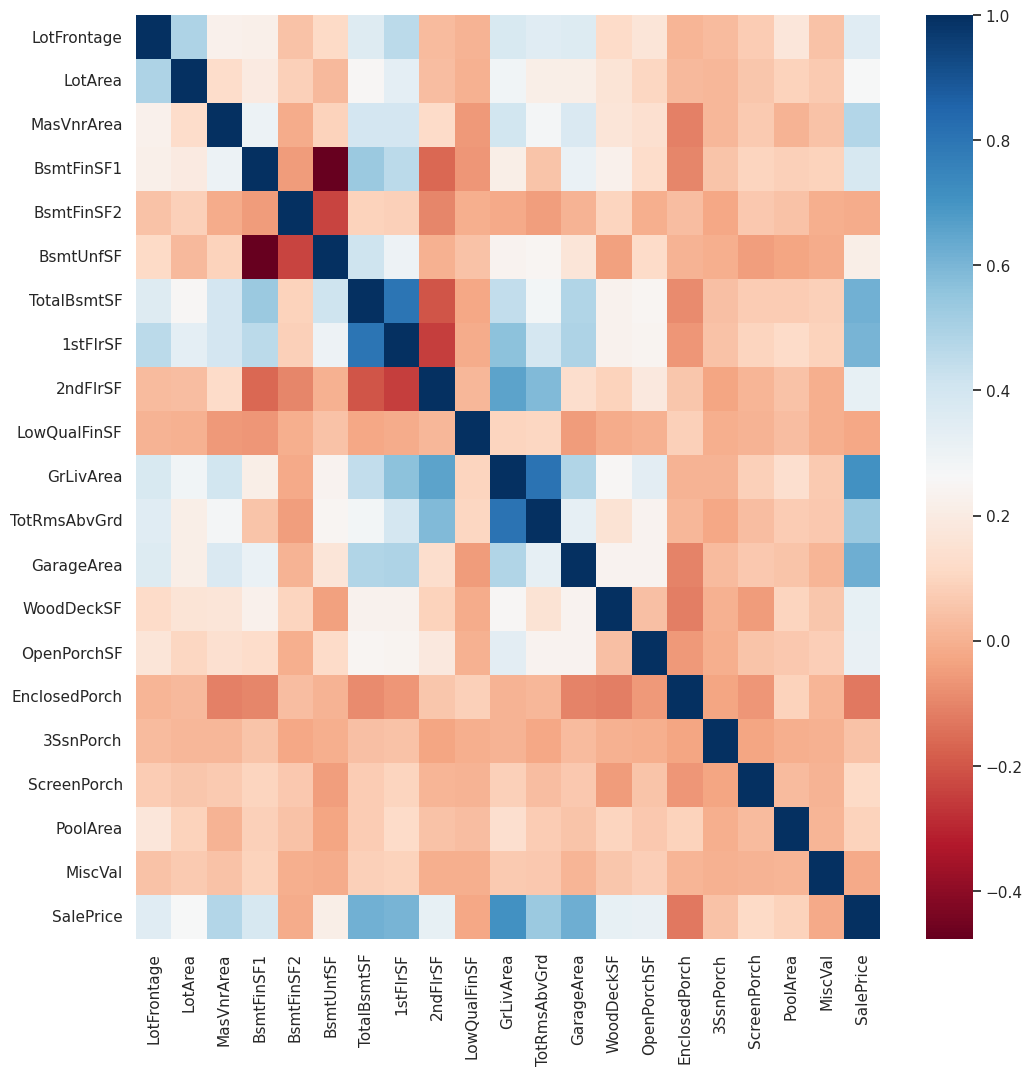

In [77]:
# correlation graph:

sns.set(rc = {"figure.figsize":(12,12)})
sns.heatmap(corr,cmap = "RdBu")
plt.show()

In [78]:
# high correlation columns 
# list of items to be dropped:

def high_correlated_cols(dataframe,plot= False, corr_th = 0.90):
    import numpy as np
    corr = dataframe.corr()
    corr_matrix = corr.abs()
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any (upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc = {"figure.figsize":(15,15)})
        sns.heatmap(corr_matrix,cmap = "RdBu")
        plt.show()
    return drop_list

In [79]:
# applying the function:

high_correlated_cols(df[num_cols],plot=False)

[]

<a id = "10"></a>
## 5. Data Preprocessing

<a id = "11"></a>
### 5.1 Missing Values 

In [80]:
# defining a function for missing values:

def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

In [81]:
# creating a list:

no_cols = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu",
           "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [82]:
# filling the no_cols:

for col in no_cols:
    df[col].fillna("No", inplace=True)

/tmp/ipykernel_13006/533929966.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("No", inplace=True)


In [83]:
# checking:

missing_values_table(df)

              n_miss  ratio
MasVnrType      1766  60.50
SalePrice       1459  49.98
LotFrontage      486  16.65
GarageYrBlt      159   5.45
MasVnrArea        23   0.79
MSZoning           4   0.14
BsmtFullBath       2   0.07
BsmtHalfBath       2   0.07
Functional         2   0.07
Utilities          2   0.07
Exterior2nd        1   0.03
BsmtFinSF1         1   0.03
BsmtFinSF2         1   0.03
BsmtUnfSF          1   0.03
Exterior1st        1   0.03
Electrical         1   0.03
KitchenQual        1   0.03
GarageCars         1   0.03
GarageArea         1   0.03
SaleType           1   0.03
TotalBsmtSF        1   0.03


In [84]:
def quick_missing_imp(data, num_method="median", cat_length=20, target="SalePrice"):
    variables_with_na = [col for col in data.columns if data[col].isnull().sum() > 0]
    temp_target = data[target]
    print("# BEFORE")
    print(data[variables_with_na].isnull().sum(), "\n\n")
    data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x, axis=0)
    if num_method == "mean":
        data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
    elif num_method == "median":
        data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)
    data[target] = temp_target
    print("# AFTER \n Imputation method is 'MODE' for categorical variables!")
    print(" Imputation method is '" + num_method.upper() + "' for numeric variables! \n")
    print(data[variables_with_na].isnull().sum(), "\n\n")
    return data

In [85]:
df = quick_missing_imp(df, num_method="median", cat_length=17)

# BEFORE
MSZoning           4
LotFrontage      486
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType      1766
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
GarageYrBlt      159
GarageCars         1
GarageArea         1
SaleType           1
SalePrice       1459
dtype: int64 


# AFTER 
 Imputation method is 'MODE' for categorical variables!
 Imputation method is 'MEDIAN' for numeric variables! 

MSZoning           0
LotFrontage        0
Utilities          0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Electrical         0
BsmtFullBath       0
BsmtHalfBath       0
KitchenQual        0
Functional         0
GarageYrBlt        0
GarageCars         0
GarageArea         0
SaleType      

/tmp/ipykernel_13006/3751745336.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x, axis=0)


<a id = "12"></a>
### 5.2 Outlier Suppression

In [86]:
# outlier suppression:

def replace_with_thresholds(dataframe,variable):
    low, up = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low),variable] = low
    dataframe.loc[(dataframe[variable] > up),variable] = up

In [87]:
df[have_outliers].dtypes

LotFrontage      float64
LotArea            int64
BsmtFinSF1       float64
TotalBsmtSF      float64
1stFlrSF           int64
LowQualFinSF       int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
PoolArea           int64
MiscVal            int64
dtype: object

In [88]:
#applying the function:

for col in have_outliers:
    if col not in ["SalePrice"]:
        replace_with_thresholds(df, col)

/tmp/ipykernel_13006/3734444267.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-45357.96000000011' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low),variable] = low
/tmp/ipykernel_13006/3734444267.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2132.0300000000025' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low),variable] = low
/tmp/ipykernel_13006/3734444267.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-230.76000000000295' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low),variable] = 

<a id = "13"></a>
### 5.3 Encoding for Base Model

In [89]:
df_base = df.copy()

In [90]:
# for categorical columns:

In [91]:
# defining a function for rare analysis:

def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"Count": dataframe[col].value_counts(),
                            "Ratio": dataframe[col].value_counts() / len(dataframe),
                            "Target_Mean": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [92]:
# defining a function for rare encoding:

def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()
    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]
    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])
    return temp_df

In [93]:
# applying the function:

rare_encoder(df_base, 0.01)
df_base.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0   8450.0   Pave    No      Reg   
1   2          20       RL         80.0   9600.0   Pave    No      Reg   
2   3          60       RL         68.0  11250.0   Pave    No      IR1   
3   4          70       RL         60.0   9550.0   Pave    No      IR1   
4   5          60       RL         84.0  14260.0   Pave    No      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     No    No          No     0.0      2   
1         Lvl    AllPub  ...        0     No    No          No     0.0      5   
2         Lvl    AllPub  ...        0     No    No          No     0.0      9   
3         Lvl    AllPub  ...        0     No    No          No     0.0      2   
4         Lvl    AllPub  ...        0     No    No          No     0.0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal   208500.0  
1   2007        WD         Normal   181500.0  
2   2008        WD         Normal   223500.0  
3   2006        WD        Abnorml   140000.0  
4   2008        WD         Normal   250000.0  

[5 rows x 81 columns]

In [94]:
# defining a function for label encoding:

def label_encoder(dataframe,cols):
    labelencoder = LabelEncoder()
    dataframe[cols] = labelencoder.fit_transform(dataframe[cols])
    return dataframe

In [95]:
# creating a list to label encoding:

# binary columns:

binary_cols = [col for col in df_base.columns if (df_base[col].dtypes not in ["float64","int64","int32"]) & (df_base[col].nunique() == 2)]
binary_cols

['Street', 'Utilities', 'CentralAir']

In [96]:
# applying the function:

for col in binary_cols:
    label_encoder(df_base,col)

In [97]:
# defining a function for one-hot encoding:

def one_hot_encoder(dataframe,cols,drop_first=True):
    dataframe = pd.get_dummies(dataframe,columns = cols, drop_first=drop_first)
    return dataframe

In [98]:
# creating a list to apply one-hot encoding:

# nominal columns:

ohe_cols = [col for col in df_base.columns if (df_base[col].dtype not in ["float64","int64","int32"]) & ((df_base[col].nunique() > 2) | (df_base[col].nunique() == 1))]
ohe_cols

['MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [99]:
# applying the function:

df_base = one_hot_encoder(df_base,ohe_cols)

In [100]:
#checking:

df_base.head()

Id  MSSubClass  LotFrontage  LotArea  Street  Utilities  OverallQual  \
0   1          60         65.0   8450.0       1          0            7   
1   2          20         80.0   9600.0       1          0            6   
2   3          60         68.0  11250.0       1          0            7   
3   4          70         60.0   9550.0       1          0            7   
4   5          60         84.0  14260.0       1          0            8   

   OverallCond  YearBuilt  YearRemodAdd  ...  SaleType_ConLI  SaleType_ConLw  \
0            5       2003          2003  ...           False           False   
1            8       1976          1976  ...           False           False   
2            5       2001          2002  ...           False           False   
3            5       1915          1970  ...           False           False   
4            5       2000          2000  ...           False           False   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
0         False         False         True                  False   
1         False         False         True                  False   
2         False         False         True                  False   
3         False         False         True                  False   
4         False         False         True                  False   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                 False                 False                  True   
1                 False                 False                  True   
2                 False                 False                  True   
3                 False                 False                 False   
4                 False                 False                  True   

   SaleCondition_Partial  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False  

[5 rows x 259 columns]

In [101]:
#checking:

df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0   8450.0   Pave    No      Reg   
1   2          20       RL         80.0   9600.0   Pave    No      Reg   
2   3          60       RL         68.0  11250.0   Pave    No      IR1   
3   4          70       RL         60.0   9550.0   Pave    No      IR1   
4   5          60       RL         84.0  14260.0   Pave    No      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     No    No          No     0.0      2   
1         Lvl    AllPub  ...        0     No    No          No     0.0      5   
2         Lvl    AllPub  ...        0     No    No          No     0.0      9   
3         Lvl    AllPub  ...        0     No    No          No     0.0      2   
4         Lvl    AllPub  ...        0     No    No          No     0.0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal   208500.0  
1   2007        WD         Normal   181500.0  
2   2008        WD         Normal   223500.0  
3   2006        WD        Abnorml   140000.0  
4   2008        WD         Normal   250000.0  

[5 rows x 81 columns]

<a id = "14"></a>
### 5.4 Scaling for Base Model

In [102]:
# for numerical columns:

In [103]:
# numerical columns not in date columns:

num_cols

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice']

In [104]:
date_cols

['MoSold', 'YrSold', 'GarageYrBlt', 'YearBuilt', 'YearRemodAdd']

In [105]:
# standardization of numerical variables:

ss = StandardScaler()
ss_cols = num_cols + date_cols
ss_cols = [col for col in ss_cols if col not in ["SalePrice"]]
df_base[ss_cols] = ss.fit_transform(df_base[ss_cols])

In [106]:
#checking:

df_base.head()

Id  MSSubClass  LotFrontage   LotArea  Street  Utilities  OverallQual  \
0   1          60    -0.192291 -0.271403       1          0            7   
1   2          20     0.514738 -0.076792       1          0            6   
2   3          60    -0.050885  0.202434       1          0            7   
3   4          70    -0.427967 -0.085253       1          0            7   
4   5          60     0.703279  0.711808       1          0            8   

   OverallCond  YearBuilt  YearRemodAdd  ...  SaleType_ConLI  SaleType_ConLw  \
0            5   1.046258      0.896833  ...           False           False   
1            8   0.154764     -0.395604  ...           False           False   
2            5   0.980221      0.848965  ...           False           False   
3            5  -1.859351     -0.682812  ...           False           False   
4            5   0.947203      0.753229  ...           False           False   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
0         False         False         True                  False   
1         False         False         True                  False   
2         False         False         True                  False   
3         False         False         True                  False   
4         False         False         True                  False   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                 False                 False                  True   
1                 False                 False                  True   
2                 False                 False                  True   
3                 False                 False                 False   
4                 False                 False                  True   

   SaleCondition_Partial  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False  

[5 rows x 259 columns]

In [107]:
#checking:

df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0   8450.0   Pave    No      Reg   
1   2          20       RL         80.0   9600.0   Pave    No      Reg   
2   3          60       RL         68.0  11250.0   Pave    No      IR1   
3   4          70       RL         60.0   9550.0   Pave    No      IR1   
4   5          60       RL         84.0  14260.0   Pave    No      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     No    No          No     0.0      2   
1         Lvl    AllPub  ...        0     No    No          No     0.0      5   
2         Lvl    AllPub  ...        0     No    No          No     0.0      9   
3         Lvl    AllPub  ...        0     No    No          No     0.0      2   
4         Lvl    AllPub  ...        0     No    No          No     0.0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal   208500.0  
1   2007        WD         Normal   181500.0  
2   2008        WD         Normal   223500.0  
3   2006        WD        Abnorml   140000.0  
4   2008        WD         Normal   250000.0  

[5 rows x 81 columns]

<a id = "15"></a>
## 6. Base Model

<a id = "16"></a>
### 6.1 Hold-out Method 

In [108]:
# filtering train & test data:

train_df_base = df_base[df_base['SalePrice'].notnull()]
test_df_base = df_base[df_base['SalePrice'].isnull()]

In [109]:
y_base = train_df_base['SalePrice']  # dependent variable
X_base = train_df_base.drop(["Id", "SalePrice"], axis=1) # independent variables

In [110]:
# hold-out method:

X_base_train, X_base_test, y_base_train, y_base_test = train_test_split(X_base, y_base, test_size=0.20, random_state=24)

<a id = "17"></a>
### 6.2 Modeling

In [117]:
# model names:

models = [('Linear Regression', LinearRegression()), ('KNN', KNeighborsRegressor()), ('CART', DecisionTreeRegressor()),
          ('Random Forest', RandomForestRegressor()), ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')), ("CatBoost", CatBoostRegressor(verbose=0))]

In [118]:
# fitting models:

for name, regressor in models:
    regressor.fit(X_base_train, y_base_train)

<a id = "18"></a>
### 6.3 Model Performance Evaluation

In [119]:
# evaluating results:

for model_name, regressor in models:
    y_base_pred = regressor.predict(X_base_test)
    mae = mean_absolute_error(y_base_test, y_base_pred)
    mse = mean_squared_error(y_base_test, y_base_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_base_test, y_base_pred)
    print(f"{model_name}:")
    print(f"  MAE: {mae:.4f}")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R2: {r2:.4f}")

Linear Regression:
  MAE: 19255.8978
  MSE: 1400900169.1055
  RMSE: 37428.6010
  R2: 0.8131
KNN:
  MAE: 21863.5432
  MSE: 1506609029.1316
  RMSE: 38815.0619
  R2: 0.7990
CART:
  MAE: 26100.5788
  MSE: 2275564775.6267
  RMSE: 47702.8802
  R2: 0.6964
Random Forest:
  MAE: 17545.8891
  MSE: 982033408.1671
  RMSE: 31337.4123
  R2: 0.8690
GBM:
  MAE: 16743.7105
  MSE: 717426714.0275
  RMSE: 26784.8225
  R2: 0.9043
XGBoost:
  MAE: 18624.5033
  MSE: 1418704281.0442
  RMSE: 37665.6910
  R2: 0.8107
CatBoost:
  MAE: 15175.6304
  MSE: 738394259.0690
  RMSE: 27173.4109
  R2: 0.9015


<a id = "19"></a>
## 7. Feature Engineering

<a id = "20"></a>
### 7.1 Feature Extraction

In [120]:
# 1Story or 2Story:
    
df.loc[(df["HouseStyle"] == "1Story") | (df["HouseStyle"] == "2Story"),"New_HouseStyle"] = "1or2Story"

In [121]:
df["New_HouseStyle"] = df["New_HouseStyle"].apply(lambda x: "1or2Story" if x == "1or2Story" else "other")

In [122]:
df["New_HouseStyle"].value_counts()

New_HouseStyle
1or2Story    2343
other         576
Name: count, dtype: int64

In [123]:
df["New_1st*GrLiv"] = df["1stFlrSF"] * df["GrLivArea"]

In [124]:
df["New_1st*GrLiv"].head()

0   1463760.000
1   1592644.000
2   1643120.000
3   1650037.000
4   2516710.000
Name: New_1st*GrLiv, dtype: float64

In [125]:
df["New_Garage*GrLiv"] = df["GarageArea"] * df["GrLivArea"]

In [126]:
df["New_Garage*GrLiv"].head()

0    937080.000
1    580520.000
2   1085888.000
3   1102314.000
4   1837528.000
Name: New_Garage*GrLiv, dtype: float64

In [127]:
df["New_TotalFlrSF"] = df["1stFlrSF"] + df["2ndFlrSF"]

In [128]:
df["New_TotalFlrSF"].head()

0   1710.000
1   1262.000
2   1786.000
3   1717.000
4   2198.000
Name: New_TotalFlrSF, dtype: float64

In [129]:
df["New_TotalBsmtFin"] = df["BsmtFinSF1"] + df["BsmtFinSF2"]

In [130]:
df["New_TotalBsmtFin"].head()

0   706.000
1   978.000
2   486.000
3   216.000
4   655.000
Name: New_TotalBsmtFin, dtype: float64

In [131]:
df["New_TotalSqFeet"] = df["GrLivArea"] + df["TotalBsmtSF"]

In [132]:
df["New_TotalSqFeet"].head()

0   2566.000
1   2524.000
2   2706.000
3   2473.000
4   3343.000
Name: New_TotalSqFeet, dtype: float64

In [133]:
df["New_Restoration"] = df["YearRemodAdd"] - df["YearBuilt"]

In [134]:
df["New_Restoration"].head()

0     0
1     0
2     1
3    55
4     0
Name: New_Restoration, dtype: int32

In [135]:
df["New_HouseAge"] = df["YrSold"] - df["YearBuilt"]

In [136]:
df["New_HouseAge"].head()

0     5
1    31
2     7
3    91
4     8
Name: New_HouseAge, dtype: int32

In [137]:
df["New_RestorationAge"] = df["YrSold"] - df["YearRemodAdd"]

In [138]:
df["New_RestorationAge"].head()

0     5
1    31
2     6
3    36
4     8
Name: New_RestorationAge, dtype: int32

In [139]:
df["New_GarageAge"] = df["GarageYrBlt"] - df["YearBuilt"]

In [140]:
df["New_GarageAge"].head()

0    0.000
1    0.000
2    0.000
3   83.000
4    0.000
Name: New_GarageAge, dtype: float64

In [141]:
df["New_GarageRestorationAge"] = np.abs(df["GarageYrBlt"] - df["YearRemodAdd"])

In [142]:
df["New_GarageRestorationAge"].head()

0    0.000
1    0.000
2    1.000
3   28.000
4    0.000
Name: New_GarageRestorationAge, dtype: float64

In [143]:
df["New_GarageSold"] = df["YrSold"] - df["GarageYrBlt"]

In [144]:
df["New_GarageSold"].head()

0    5.000
1   31.000
2    7.000
3    8.000
4    8.000
Name: New_GarageSold, dtype: float64

In [145]:
df.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0   1          60       RL       65.000  8450.000   Pave    No      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace     196.000        Gd        TA      PConc       Gd       TA           No          GLQ     706.000          Unf       0.000    150.000      856.000    GasA        Ex          Y      SBrkr   856.000       854         0.000   
1   2          20       RL       80.000  9600.000   Pave    No      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd    BrkFace       0.000        TA        TA     CBlock       Gd       TA           Gd          ALQ     978.000          Unf       0.000    284.000     1262.000    GasA        Ex          Y      SBrkr  1262.000         0         0.000   
2   3          60       RL       68.000 11250.000   Pave    No      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace     162.000        Gd        TA      PConc       Gd       TA           Mn          GLQ     486.000          Unf       0.000    434.000      920.000    GasA        Ex          Y      SBrkr   920.000       866         0.000   
3   4          70       RL       60.000  9550.000   Pave    No      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng    BrkFace       0.000        TA        TA     BrkTil       TA       Gd           No          ALQ     216.000          Unf       0.000    540.000      756.000    GasA        Gd          Y      SBrkr   961.000       756         0.000   
4   5          60       RL       84.000 14260.000   Pave    No      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story            8            5       2000          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace     350.000        Gd        TA      PConc       Gd       TA           Av          GLQ     655.000          Unf       0.000    490.000     1145.000    GasA        Ex          Y      SBrkr  1145.000      1053         0.000   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice New_HouseStyle  New_1st*GrLiv  New_Garage*GrLiv  New_TotalFlrSF  New_TotalBsmtFin  \
0       1710         1.000         0.000         2         1             3             1          Gd             8        Typ           0          No     Attchd     2003.000          RFn       2.000     548.000         TA         TA          Y       0.000       61.000              0          0            0         0     No    No          No    0.000       2    2008       WD        Normal 208500.000      1or2Story    1463760.000        937080.000        1710.000           706.000   
1       1262         0.000        

<a id = "21"></a>
### 6.2 Encoding for Current & New Features

In [146]:
# for new categorical columns:

In [147]:
# defining a function for rare analysis:

def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"Count": dataframe[col].value_counts(),
                            "Ratio": dataframe[col].value_counts() / len(dataframe),
                            "Target_Mean": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [148]:
# defining a function for rare encoding:

def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()
    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]
    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])
    return temp_df

In [149]:
# applying the function:

rare_encoder(df, 0.01)
df.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0   1          60       RL       65.000  8450.000   Pave    No      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace     196.000        Gd        TA      PConc       Gd       TA           No          GLQ     706.000          Unf       0.000    150.000      856.000    GasA        Ex          Y      SBrkr   856.000       854         0.000   
1   2          20       RL       80.000  9600.000   Pave    No      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd    BrkFace       0.000        TA        TA     CBlock       Gd       TA           Gd          ALQ     978.000          Unf       0.000    284.000     1262.000    GasA        Ex          Y      SBrkr  1262.000         0         0.000   
2   3          60       RL       68.000 11250.000   Pave    No      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace     162.000        Gd        TA      PConc       Gd       TA           Mn          GLQ     486.000          Unf       0.000    434.000      920.000    GasA        Ex          Y      SBrkr   920.000       866         0.000   
3   4          70       RL       60.000  9550.000   Pave    No      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng    BrkFace       0.000        TA        TA     BrkTil       TA       Gd           No          ALQ     216.000          Unf       0.000    540.000      756.000    GasA        Gd          Y      SBrkr   961.000       756         0.000   
4   5          60       RL       84.000 14260.000   Pave    No      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story            8            5       2000          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace     350.000        Gd        TA      PConc       Gd       TA           Av          GLQ     655.000          Unf       0.000    490.000     1145.000    GasA        Ex          Y      SBrkr  1145.000      1053         0.000   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice New_HouseStyle  New_1st*GrLiv  New_Garage*GrLiv  New_TotalFlrSF  New_TotalBsmtFin  \
0       1710         1.000         0.000         2         1             3             1          Gd             8        Typ           0          No     Attchd     2003.000          RFn       2.000     548.000         TA         TA          Y       0.000       61.000              0          0            0         0     No    No          No    0.000       2    2008       WD        Normal 208500.000      1or2Story    1463760.000        937080.000        1710.000           706.000   
1       1262         0.000        

In [150]:
# defining a function for label encoding:

def label_encoder(dataframe,cols):
    labelencoder = LabelEncoder()
    dataframe[cols] = labelencoder.fit_transform(dataframe[cols])
    return dataframe

In [151]:
# creating a list to label encoding:

# binary columns:

binary_cols = [col for col in df.columns if (df[col].dtypes not in ["float64","int64","int32"]) & (df[col].nunique() == 2)]
binary_cols

['Street', 'Utilities', 'CentralAir', 'New_HouseStyle']

In [152]:
# applying the function :

for col in binary_cols:
    label_encoder(df,col)

In [153]:
# defining a function for one-hot encoding:

def one_hot_encoder(dataframe,cols,drop_first=True):
    dataframe = pd.get_dummies(dataframe,columns = cols, drop_first=drop_first)
    return dataframe

In [154]:
# creating a list to apply one-hot encoding:

# nominal columns:

ohe_cols = [col for col in df.columns if (df[col].dtype not in ["float64","int64","int32"]) & ((df[col].nunique() > 2) | (df[col].nunique() == 1))]
ohe_cols

['MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [155]:
# applying the function:

df = one_hot_encoder(df,ohe_cols)

In [156]:
#checking:

df.head()

Id  MSSubClass  LotFrontage   LotArea  Street  Utilities  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  New_HouseStyle  \
0   1          60       65.000  8450.000       1          0            7            5       2003          2003     196.000     706.000       0.000    150.000      856.000           1   856.000       854         0.000       1710         1.000         0.000         2         1             3             1             8           0     2003.000       2.000     548.000       0.000       61.000              0          0            0         0    0.000       2    2008 208500.000               0   
1   2          20       80.000  9600.000       1          0            6            8       1976          1976       0.000     978.000       0.000    284.000     1262.000           1  1262.000         0         0.000       1262         0.000         1.000         2         0             3             1             6           1     1976.000       2.000     460.000     298.000        0.000              0          0            0         0    0.000       5    2007 181500.000               0   
2   3          60       68.000 11250.000       1          0            7            5       2001          2002     162.000     486.000       0.000    434.000      920.000           1   920.000       866         0.000       1786         1.000         0.000         2         1             3             1             6           1     2001.000       2.000     608.000       0.000       42.000              0          0            0         0    0.000       9    2008 223500.000               0   
3   4          70       60.000  9550.000       1          0            7            5       1915          1970       0.000     216.000       0.000    540.000      756.000           1   961.000       756         0.000       1717         1.000         0.000         1         0             3             1             7           1     1998.000       3.000     642.000       0.000       35.000            272          0            0         0    0.000       2    2006 140000.000               0   
4   5          60       84.000 14260.000       1          0            8            5       2000          2000     350.000     655.000       0.000    490.000     1145.000           1  1145.000      1053         0.000       2198         1.000         0.000         2         1             4             1             9           1     2000.000       3.000     836.000     192.000       84.000              0          0            0         0    0.000      12    2008 250000.000               0   

   New_1st*GrLiv  New_Garage*GrLiv  New_TotalFlrSF  New_TotalBsmtFin  New_TotalSqFeet  New_Restoration  New_HouseAge  New_RestorationAge  New_GarageAge  New_GarageRestorationAge  New_GarageSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Alley_No  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0    1463760.000        937080.000        1710.000           706.000         2566.000                0             5                   5          0.000                     0.000           5.000        False        False         True        False      True       False         False         False          True            False            False             True              False          False          False              True          False          False                 False   
1    1592644.000        580520.000        1262.000          

<a id = "22"></a>
### 6.3 Feature Scaling

In [157]:
# for current & new numerical columns:

In [158]:
# standardization of numerical variables:

ss = StandardScaler()
ss_cols = num_cols + date_cols
ss_cols = [col for col in ss_cols if col not in ["SalePrice"]]
df[ss_cols] = ss.fit_transform(df[ss_cols])

In [159]:
#checking:

df.head()

Id  MSSubClass  LotFrontage  LotArea  Street  Utilities  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  New_HouseStyle  \
0   1          60       -0.192   -0.271       1          0            7            5      1.046         0.897       0.529       0.589      -0.293     -0.935       -0.446           1    -0.775     1.207        -0.108      0.414         1.000         0.000         2         1             3             1         0.987           0        0.999       2.000       0.349      -0.744        0.200         -0.367     -0.105       -0.286     0.000   -0.150  -1.552   0.158 208500.000               0   
1   2          20        0.515   -0.077       1          0            6            8      0.155        -0.396      -0.567       1.193      -0.293     -0.630        0.480           1     0.262    -0.785        -0.108     -0.472         0.000         1.000         2         0             3             1        -0.288           1       -0.087       2.000      -0.060       1.623       -0.704         -0.367     -0.105       -0.286     0.000   -0.150  -0.447  -0.603 181500.000               0   
2   3          60       -0.051    0.202       1          0            7            5      0.980         0.849       0.339       0.100      -0.293     -0.288       -0.300           1    -0.611     1.235        -0.108      0.564         1.000         0.000         2         1             3             1        -0.288           1        0.919       2.000       0.628      -0.744       -0.081         -0.367     -0.105       -0.286     0.000   -0.150   1.027   0.158 223500.000               0   
3   4          70       -0.428   -0.085       1          0            7            5     -1.859        -0.683      -0.567      -0.499      -0.293     -0.047       -0.674           1    -0.507     0.979        -0.108      0.427         1.000         0.000         1         0             3             1         0.350           1        0.798       3.000       0.785      -0.744       -0.185          3.972     -0.105       -0.286     0.000   -0.150  -1.552  -1.364 140000.000               0   
4   5          60        0.703    0.712       1          0            8            5      0.947         0.753       1.390       0.476      -0.293     -0.161        0.213           1    -0.037     1.672        -0.108      1.378         1.000         0.000         2         1             4             1         1.624           1        0.878       3.000       1.686       0.781        0.541         -0.367     -0.105       -0.286     0.000   -0.150   2.132   0.158 250000.000               0   

   New_1st*GrLiv  New_Garage*GrLiv  New_TotalFlrSF  New_TotalBsmtFin  New_TotalSqFeet  New_Restoration  New_HouseAge  New_RestorationAge  New_GarageAge  New_GarageRestorationAge  New_GarageSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Alley_No  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0    1463760.000        937080.000        1710.000           706.000         2566.000                0             5                   5          0.000                     0.000           5.000        False        False         True        False      True       False         False         False          True            False            False             True              False          False          False              True          False          False                 False   
1    1592644.000        580520.000        1262.000           978.0

<a id = "23"></a>
# 8. Modeling

<a id = "24"></a>
## 8.1 Hold-out Method 

In [160]:
# filtering train & test data:

train_df = df[df['SalePrice'].notnull()]
test_df = df[df['SalePrice'].isnull()]

In [161]:
y = train_df['SalePrice']  # dependent variable
X = train_df.drop(["Id", "SalePrice"], axis=1) # independent variables

In [162]:
# hold-out method:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=24)

<a id = "25"></a>
## 8.2 Modeling 

In [163]:
# model names:

models = [('Linear Regression', LinearRegression()), ('KNN', KNeighborsRegressor()), ('CART', DecisionTreeRegressor()),
          ('Random Forest', RandomForestRegressor()), ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),("CatBoost", CatBoostRegressor(verbose=0))]

In [164]:
# fitting models:

for name, regressor in models:
    regressor.fit(X_train, y_train)

<a id = "26"></a>
## 8.3. Model Performance Evaluation

In [165]:
# evaluating results:

for model_name, regressor in models:
    y_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name}:")
    print(f"  MAE: {mae:.4f}")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R2: {r2:.4f}")

Linear Regression:
  MAE: 277312683.2883
  MSE: 11226248763362291712.0000
  RMSE: 3350559470.2023
  R2: -1497597556.0877
KNN:
  MAE: 30798.5055
  MSE: 2125271491.8192
  RMSE: 46100.6669
  R2: 0.7165
CART:
  MAE: 27180.5411
  MSE: 2698947175.9863
  RMSE: 51951.3924
  R2: 0.6400
Random Forest:
  MAE: 16911.5724
  MSE: 893990308.9148
  RMSE: 29899.6707
  R2: 0.8807
GBM:
  MAE: 15505.7321
  MSE: 689941665.3626
  RMSE: 26266.7407
  R2: 0.9080
XGBoost:
  MAE: 16929.6173
  MSE: 756370641.9971
  RMSE: 27502.1934
  R2: 0.8991
CatBoost:
  MAE: 14760.9929
  MSE: 831146563.3821
  RMSE: 28829.6126
  R2: 0.8891


<a id = "27"></a>
## 8.4 Cross Validation

In [166]:
# evaluating 5-fold cross validation results:

for model_name, regressor in models:
    scoring = {'mae': 'neg_mean_absolute_error','mse': 'neg_mean_squared_error','r2': 'r2'}
    cv_results = cross_validate(regressor,X,y,cv=5,scoring=scoring)
    print(f"{model_name}:",end="\n")
    print("Average MAE: ", -cv_results['test_mae'].mean())
    print("Average MSE: ", -cv_results['test_mse'].mean())
    print("Average R2: ", cv_results['test_r2'].mean(),end="\n\n")

Linear Regression:
Average MAE:  203428289.0330479
Average MSE:  6.016224158303089e+19
Average R2:  -8972252479.94628

KNN:
Average MAE:  31552.781506849315
Average MSE:  2256100901.9062195
Average R2:  0.6390490007381662

CART:
Average MAE:  24906.508219178086
Average MSE:  1506986533.4931505
Average R2:  0.7579818403978784

Random Forest:
Average MAE:  17181.613452054793
Average MSE:  909261298.4150826
Average R2:  0.8575091192897648

GBM:
Average MAE:  15828.874193434487
Average MSE:  666761739.9978809
Average R2:  0.8945719746596215

XGBoost:
Average MAE:  16949.98656892123
Average MSE:  789795547.4369491
Average R2:  0.8765104109025387

CatBoost:
Average MAE:  14293.848542179676
Average MSE:  639508091.4087696
Average R2:  0.9004059815461278



<a id = "28"></a>
# 9. Hyperparameter Tuning

<a id = "29"></a>
## 9.1 Determining Parameters

In [167]:
# default parameters of the models:

for model_name, regressor in models:
    print(f"####################### {model_name} #######################")
    print(f"parameters: {regressor.get_params()}",end="\n\n")

####################### Linear Regression #######################
parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

####################### KNN #######################
parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

####################### CART #######################
parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}

####################### Random Forest #######################
parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 

In [169]:
# determined parameters of the models for hiperparameter tuning:

model_params = [
    ('Linear Regression', LinearRegression(), {
        'fit_intercept': [True, False]
    }),
    ('KNN', KNeighborsRegressor(), {
        'n_neighbors': range(3,11),
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }),
    ('CART', DecisionTreeRegressor(), {
        'criterion': ['mse', 'friedman_mse', 'mae'],
        'splitter': ['best', 'random'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': range(2,10)
    }),
    ('Random Forest', RandomForestRegressor(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }),
    ('GBM', GradientBoostingRegressor(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'max_depth': [3, 5, 7]
    }),
    ('XGBoost', XGBRegressor(objective='reg:squarederror'), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'max_depth': [3, 5, 7]
    }),
   
    ('CatBoost', CatBoostRegressor(verbose=0), {
        'iterations': [200, 500],
        'learning_rate': [0.01, 0.1, 0.2],
        'depth': [3, 5, 7]
    })
]

<a id = "30"></a>
## 9.2 Best Parameters & Best Scores

In [170]:
# hiperparameter tuning:
# best parameters and best scores on the models:

best_model_name = None
best_model = None
best_score = float('-inf')
best_params = None

for model_name, regressor, params in model_params:
    regressor_grid = GridSearchCV(regressor, params, cv=5, n_jobs = -1, verbose = True).fit(X, y)
    
    print(f"Model: {model_name}")
    print("Best Parameters:", regressor_grid.best_params_)
    print("Best Score:", regressor_grid.best_score_,end="\n\n")
    print("######################",end="\n\n")
    
    if  regressor_grid.best_score_ > best_score:
        best_model_name = model_name
        best_model = regressor
        best_score = regressor_grid.best_score_
        best_params = regressor_grid.best_params_
        
      
print("######################### Best Model ve Hyperparameters #########################")
print(f"Model: {best_model_name}")
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Model: Linear Regression
Best Parameters: {'fit_intercept': True}
Best Score: -593.4817473014424

######################

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Model: KNN
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}
Best Score: 0.6710557726536364

######################

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Model: CART
Best Parameters: {'criterion': 'friedman_mse', 'max_depth': None, 'min_samples_split': 3, 'splitter': 'random'}
Best Score: 0.7811061999822918

######################

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Model: Random Forest
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.8628497338181242

######################

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Model: GBM
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 2

In [173]:
best_model

GradientBoostingRegressor()

In [174]:
# defining a function to find parameters for the best model:

def find_best_model_params(model_params,best_model):
    for model_name, regressor, params in model_params:
        if best_model == regressor:
            best_model_params = params
    return best_model_params

In [175]:
#appyling the function:

best_model_params = find_best_model_params(model_params,best_model)

In [176]:
best_model_params

{'n_estimators': [50, 100, 200],
 'learning_rate': [0.01, 0.1, 0.2],
 'subsample': [0.8, 1.0],
 'max_depth': [3, 5, 7]}

In [177]:
regressor_best_grid = GridSearchCV(best_model, best_model_params, cv=5, n_jobs = -1, verbose = True).fit(X, y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [178]:
regressor_best_grid

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             verbose=True)

<a id = "31"></a>
# 10. Final Model

<a id = "32"></a>
## 10.1 Modeling

In [179]:
# fitting final model to use best parameters:

model_final = GradientBoostingRegressor(**regressor_best_grid.best_params_).fit(X, y)

<a id = "33"></a>
## 10.2 Cross Validation

In [180]:
# evaluating 5-fold cross validation results:

scoring = {'mae': 'neg_mean_absolute_error','mse': 'neg_mean_squared_error','r2': 'r2'}
cv_results_final = cross_validate(model_final,X,y,cv=5,scoring=scoring)
print(f"Best Model: {best_model_name}",end="\n")
print("Average MAE: ", -cv_results['test_mae'].mean())
print("Average MSE: ", -cv_results['test_mse'].mean())
print("Average R2: ", cv_results['test_r2'].mean(),end="\n\n")

Best Model: GBM
Average MAE:  14293.848542179676
Average MSE:  639508091.4087696
Average R2:  0.9004059815461278



<a id = "34"></a>
## 10.3 Feature Importance

In [181]:
# creating function to visualize:

def plot_importance(model, features, start = 0 ,num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    print(feature_imp.sort_values("Value",ascending=False)[start:num])
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[start:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

     Value               Feature
44   0.336       New_TotalSqFeet
5    0.311           OverallQual
41   0.099      New_Garage*GrLiv
40   0.042         New_1st*GrLiv
16   0.030              2ndFlrSF
46   0.019          New_HouseAge
10   0.015            BsmtFinSF1
28   0.013            GarageCars
7    0.012             YearBuilt
2    0.009               LotArea
6    0.007           OverallCond
47   0.006    New_RestorationAge
42   0.006        New_TotalFlrSF
8    0.006          YearRemodAdd
43   0.006      New_TotalBsmtFin
26   0.006            Fireplaces
221  0.005        FireplaceQu_No
27   0.004           GarageYrBlt
212  0.004        KitchenQual_TA
24   0.003          KitchenAbvGr
18   0.003             GrLivArea
75   0.003  Neighborhood_Edwards
224  0.003     GarageType_Attchd
182  0.003       BsmtExposure_Gd
29   0.003            GarageArea
53   0.003           MSZoning_RL
14   0.002            CentralAir
74   0.002  Neighborhood_Crawfor
261  0.002          SaleType_New
12   0.002

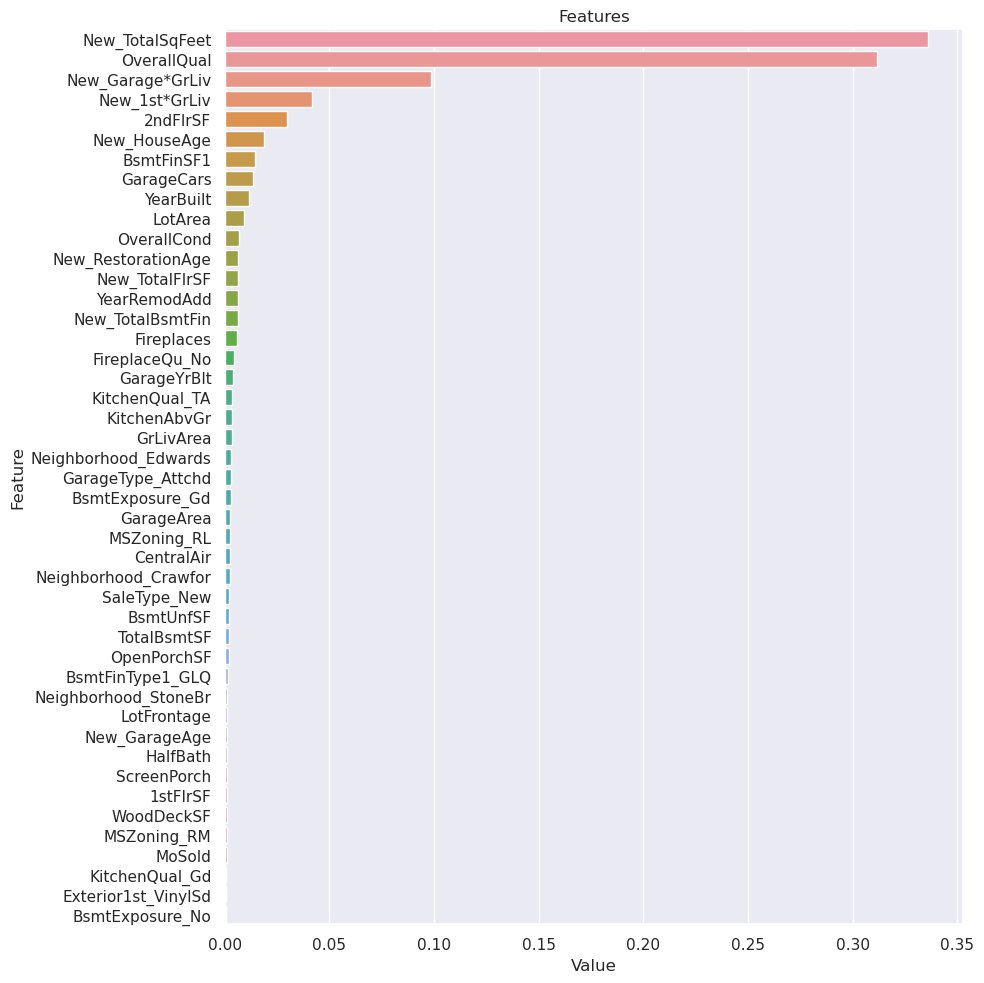

In [182]:
# appyling the function:

plot_importance(model_final, X,start=0, num=45)

<a id = "35"></a>
## 10.4 Prediction

In [183]:
# Make predictions on the test set:

predictions = model_final.predict(test_df.drop(["Id", "SalePrice"], axis=1))

<a id = "36"></a>
## 10.5 Creating a Submission File

In [184]:
# creating a DataFrame with Id and Prediction columns:

submission = pd.DataFrame({
    'Id': test_df["Id"],
    'SalePrice': predictions
})

In [185]:
# saving to CSV file:

submission.to_csv('submission_new.csv', index=False)

In [186]:
# display first 5 rows:

submission.head()

Id  SalePrice
0  1461 127329.419
1  1462 157764.619
2  1463 185207.513
3  1464 187738.109
4  1465 182789.783